In [358]:
# Importēt pandas un os
# Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
# https://docs.python.org/3/library/os.html
import pandas as pd
import os

# Relatīvais ceļš
relative_path = os.path.relpath("C:/Users/Liene/Desktop/project/project/all_months_sale.csv")
print(relative_path)

project\all_months_sale.csv


In [359]:
# Lasīt datus no csv faila un parādīt pirmās 10 rindiņas
all_data = pd.read_csv("project/all_months_sale.csv")
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [360]:
# Atbrīvoties no bezdatu rindiņām
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [361]:
# Atbrīvoties no liekajām rindiņām, kur atkārtojas kolonnu nosaukumi
all_data = all_data[all_data["Order Date"].str[0:2]!="Or"]

In [362]:
# Dabūt jaunu kolonnu ar mēneša numuru no datumu kolonnas
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [363]:
# Pārveidot datus uz numeric un aprēķināt ieņēmumus no pārdotā gab. skaita * cenas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [364]:
# Dabūt jaunu kolonnu ar pilsētu un štatu, sasummēt pārdoto pa pilsētām
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [365]:
results = all_data.groupby('Month').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73,Dallas TX New York City NY New York City NY S...
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42,Portland ME San Francisco CA New York City NY...
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38,San Francisco CA Portland OR San Francisco CA...
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24,Dallas TX Boston MA Los Angeles CA Los Angele...
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75,Portland OR San Francisco CA Boston MA Boston...
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26,Portland ME San Francisco CA Los Angeles CA S...
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76,Atlanta GA Seattle WA Atlanta GA Atlanta GA S...
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88,Seattle WA Dallas TX Portland OR Los Angeles ...
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13,San Francisco CA San Francisco CA Seattle WA ...


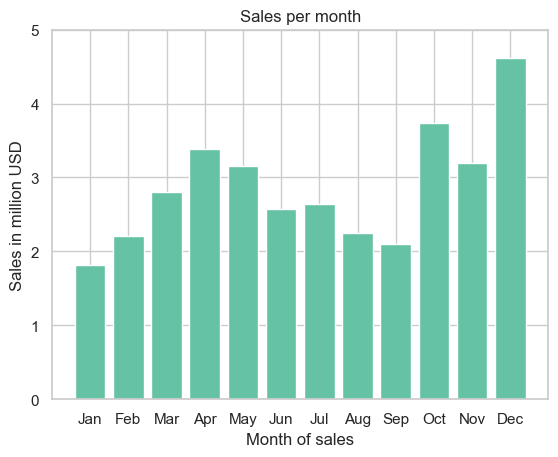

In [366]:
# Vizualizēt ieņēmumus pa mēnešiem
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
# Seaborn is a Python data visualization library based on matplotlib.
# https://docs.python.org/3/library/calendar.html
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

menesis = range(1,13)
results = all_data.groupby('Month').sum()
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")
plt.bar(menesis, results['Sales'])
plt.title("Sales per month")
plt.xticks(menesis, calendar.month_abbr[1:13])
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.ylabel('Sales in million USD')
plt.xlabel('Month of sales')
plt.savefig("SalesPerMonth.png")
plt.show()

In [367]:
results = all_data.groupby('City').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta GA,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin TX,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston MA,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas TX,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles CA,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City NY,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland ME,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland OR,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco CA,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


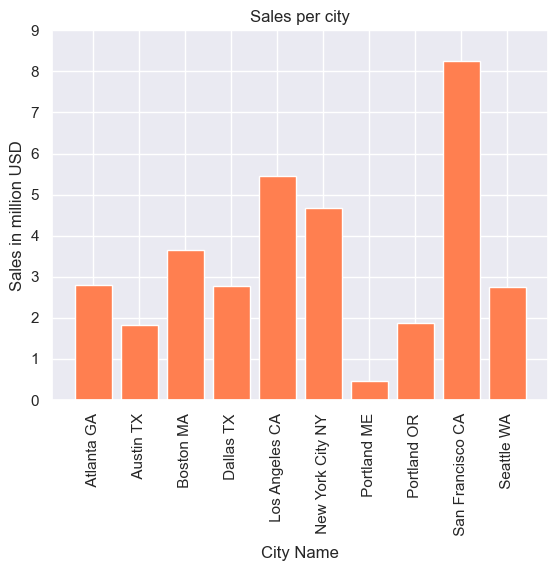

In [368]:
# Vizualizēt ieņēmumus pa pilsētām
cities = [city for city, df in all_data.groupby('City')]

sns.set_theme(style="darkgrid")
plt.bar(cities, results['Sales'], color="coral")
plt.title("Sales per city")
plt.xticks(cities, rotation='vertical')
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int)) #Scaling in million USD
plt.ylabel('Sales in million USD')
plt.xlabel('City Name')
plt.show()

In [369]:
# Dabūt jaunu stundu kolonnu
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

C:\Users\Liene\AppData\Local\Temp\ipykernel_14228\257045103.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


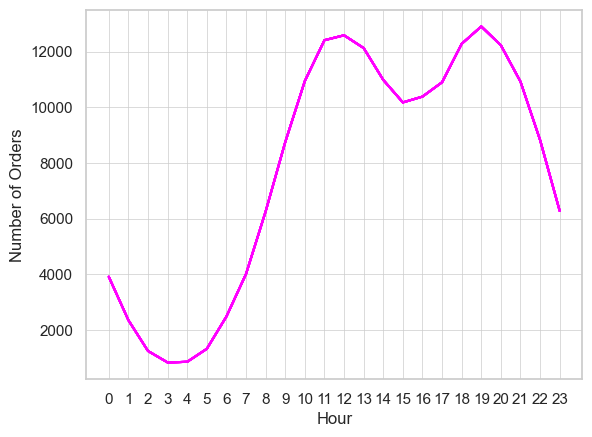

In [370]:
# Vizualizēt pārdoto pa stundām

hours = [hour for hour, df in all_data.groupby('Hour')]

sns.set_theme(style="whitegrid")
plt.plot(hours, all_data.groupby(['Hour']).count(), color="magenta")
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid(linewidth=0.5)
plt.show()

In [371]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\Liene\AppData\Local\Temp\ipykernel_14228\4061286189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [372]:
#Importing libraries
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
      row_list = row.split(',')
      count.update(Counter(combinations(row_list, 2)))
  
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [376]:
# Pārbaudīt datu tipus
print(all_data.dtypes)

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Purchase Address     object
Month                 int32
Sales               float64
City                 object
Hour                  int32
Minute                int32
dtype: object


In [377]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


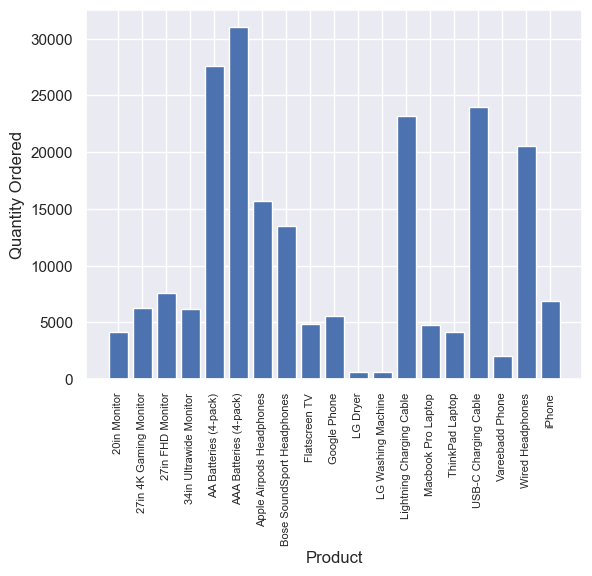

In [374]:
df = pd.DataFrame(all_data)
all_data = df.select_dtypes(exclude=['datetime64'])
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

sns.set_theme(style="darkgrid")
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size = 8)
plt.show()

In [380]:
prices = all_data.groupby('Product').mean()['Price Each'] 

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='blue')
ax2.plot(products, prices, 'pink')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='blue')
ax2.set_ylabel('Price ($)', color = 'pink')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

TypeError: Could not convert 765 Cherry St, Seattle, WA 98101804 Church St, Dallas, TX 75001952 1st St, Boston, MA 02215873 Sunset St, San Francisco, CA 94016748 Washington St, New York City, NY 10001848 West St, Dallas, TX 75001575 Hickory St, San Francisco, CA 94016701 North St, San Francisco, CA 94016625 Willow St, Boston, MA 02215213 Highland St, Boston, MA 02215144 Adams St, Los Angeles, CA 90001554 Cedar St, Austin, TX 73301506 River St, San Francisco, CA 94016613 7th St, Los Angeles, CA 90001947 Hickory St, San Francisco, CA 94016276 Lincoln St, Los Angeles, CA 90001164 Pine St, Seattle, WA 98101171 Chestnut St, Portland, ME 04101438 Park St, Austin, TX 73301196 Lake St, Dallas, TX 75001169 Center St, Austin, TX 73301117 5th St, Atlanta, GA 3030115 Pine St, New York City, NY 10001115 Park St, Portland, OR 97035999 12th St, New York City, NY 10001958 Jackson St, San Francisco, CA 94016324 River St, New York City, NY 10001340 Sunset St, Atlanta, GA 30301319 9th St, New York City, NY 10001815 West St, Austin, TX 73301748 4th St, San Francisco, CA 9401650 Lincoln St, Los Angeles, CA 9000174 Forest St, Seattle, WA 98101780 South St, New York City, NY 10001728 12th St, Dallas, TX 75001408 10th St, San Francisco, CA 94016871 Jefferson St, Los Angeles, CA 90001952 Center St, New York City, NY 10001405 Cherry St, Boston, MA 02215879 Washington St, New York City, NY 10001179 River St, Austin, TX 73301878 Elm St, Dallas, TX 75001453 Park St, New York City, NY 10001954 Washington St, Seattle, WA 98101308 14th St, Austin, TX 73301492 12th St, Dallas, TX 75001336 2nd St, Dallas, TX 75001808 7th St, San Francisco, CA 94016408 Hill St, Boston, MA 02215248 Sunset St, Portland, OR 97035840 Jefferson St, Boston, MA 02215523 6th St, San Francisco, CA 9401624 Willow St, San Francisco, CA 94016485 Highland St, Dallas, TX 75001479 9th St, Los Angeles, CA 90001409 Jefferson St, San Francisco, CA 94016744 8th St, New York City, NY 10001604 Jackson St, Los Angeles, CA 9000186 Sunset St, New York City, NY 10001406 Chestnut St, Los Angeles, CA 90001775 North St, Boston, MA 02215859 South St, Seattle, WA 98101561 Lake St, Seattle, WA 98101113 Spruce St, New York City, NY 100014 8th St, New York City, NY 10001635 Forest St, New York City, NY 10001326 Church St, Seattle, WA 98101638 9th St, San Francisco, CA 94016928 West St, San Francisco, CA 94016866 14th St, Atlanta, GA 30301796 Johnson St, Portland, OR 97035398 Cedar St, Los Angeles, CA 90001415 Lakeview St, New York City, NY 10001263 Washington St, New York City, NY 10001388 Wilson St, Los Angeles, CA 90001255 West St, Boston, MA 02215129 Forest St, Los Angeles, CA 90001714 Meadow St, Los Angeles, CA 90001339 14th St, Seattle, WA 98101139 Park St, San Francisco, CA 94016265 Park St, San Francisco, CA 94016346 Church St, Seattle, WA 98101531 7th St, Seattle, WA 98101777 Dogwood St, Atlanta, GA 30301369 13th St, New York City, NY 10001124 Wilson St, Boston, MA 02215970 Park St, Dallas, TX 75001873 Willow St, Boston, MA 02215536 11th St, Los Angeles, CA 90001237 12th St, New York City, NY 10001810 Sunset St, Dallas, TX 7500147 7th St, Seattle, WA 98101122 Forest St, Portland, OR 97035605 River St, Portland, ME 04101593 North St, Boston, MA 02215522 Dogwood St, Boston, MA 02215843 Lakeview St, Los Angeles, CA 90001969 Spruce St, San Francisco, CA 94016161 Sunset St, Los Angeles, CA 9000157 Lincoln St, Boston, MA 02215725 12th St, Atlanta, GA 30301783 Dogwood St, Boston, MA 02215939 Pine St, San Francisco, CA 94016918 14th St, Boston, MA 02215111 14th St, Boston, MA 02215566 5th St, Dallas, TX 75001104 Cedar St, San Francisco, CA 94016399 Center St, San Francisco, CA 94016758 Park St, New York City, NY 10001755 Willow St, San Francisco, CA 94016689 9th St, Atlanta, GA 3030176 Cedar St, Los Angeles, CA 90001536 Main St, New York City, NY 10001743 Adams St, San Francisco, CA 94016606 South St, San Francisco, CA 94016968 River St, Boston, MA 02215453 Willow St, Los Angeles, CA 90001783 Cherry St, Atlanta, GA 3030143 Lake St, Seattle, WA 98101997 Cherry St, Portland, OR 97035583 9th St, San Francisco, CA 9401688 Main St, Austin, TX 7330112 Forest St, Los Angeles, CA 9000184 7th St, San Francisco, CA 94016346 Pine St, New York City, NY 10001619 11th St, Los Angeles, CA 90001500 Willow St, Austin, TX 7330193 Willow St, San Francisco, CA 94016130 Lake St, Seattle, WA 98101179 Hickory St, New York City, NY 10001413 Maple St, New York City, NY 10001306 Cherry St, Boston, MA 02215678 Lakeview St, Los Angeles, CA 90001396 13th St, Los Angeles, CA 90001557 6th St, Dallas, TX 7500174 Wilson St, Los Angeles, CA 90001389 Lincoln St, San Francisco, CA 94016545 Jefferson St, New York City, NY 10001250 9th St, Portland, OR 97035886 12th St, New York City, NY 10001372 Jackson St, Portland, OR 97035986 Adams St, Los Angeles, CA 90001960 Pine St, San Francisco, CA 94016189 Sunset St, Los Angeles, CA 90001511 10th St, Boston, MA 02215332 13th St, Portland, OR 97035294 14th St, Dallas, TX 75001594 13th St, San Francisco, CA 94016253 Cherry St, Austin, TX 73301312 Johnson St, San Francisco, CA 94016729 12th St, San Francisco, CA 9401663 Center St, Los Angeles, CA 90001933 11th St, San Francisco, CA 94016321 Hill St, Atlanta, GA 30301727 Dogwood St, Portland, OR 97035538 West St, Seattle, WA 98101883 Jefferson St, Boston, MA 02215324 Cedar St, San Francisco, CA 94016106 Sunset St, Los Angeles, CA 9000112 Ridge St, Austin, TX 73301332 Cherry St, Seattle, WA 98101398 7th St, San Francisco, CA 94016455 13th St, Atlanta, GA 30301702 6th St, Atlanta, GA 3030191 12th St, Boston, MA 02215964 9th St, Seattle, WA 98101295 Main St, Los Angeles, CA 90001253 Dogwood St, Portland, OR 97035849 Jefferson St, Los Angeles, CA 9000118 1st St, San Francisco, CA 94016694 Jackson St, Seattle, WA 98101126 Dogwood St, Seattle, WA 98101982 South St, Boston, MA 02215150 6th St, New York City, NY 10001979 Wilson St, New York City, NY 10001559 Chestnut St, New York City, NY 10001273 4th St, Austin, TX 73301233 5th St, San Francisco, CA 94016942 8th St, Boston, MA 02215156 12th St, New York City, NY 10001170 7th St, New York City, NY 10001964 Main St, Los Angeles, CA 90001971 Center St, Seattle, WA 98101746 Cherry St, Boston, MA 02215719 Park St, Boston, MA 02215221 Ridge St, San Francisco, CA 94016202 Church St, San Francisco, CA 94016524 Park St, Boston, MA 02215948 9th St, San Francisco, CA 94016502 4th St, Los Angeles, CA 90001957 Main St, New York City, NY 10001300 Jackson St, Seattle, WA 98101996 11th St, Austin, TX 73301105 Lakeview St, San Francisco, CA 94016590 2nd St, San Francisco, CA 94016444 Maple St, Atlanta, GA 30301516 8th St, San Francisco, CA 94016158 1st St, Atlanta, GA 30301827 Hickory St, Los Angeles, CA 90001612 Cedar St, Austin, TX 73301626 Wilson St, New York City, NY 1000151 North St, Dallas, TX 75001421 Center St, Portland, OR 97035105 5th St, Los Angeles, CA 90001686 Jefferson St, New York City, NY 1000191 Church St, New York City, NY 10001555 Lakeview St, New York City, NY 10001598 Willow St, Los Angeles, CA 90001136 12th St, Los Angeles, CA 90001670 2nd St, Seattle, WA 98101766 Maple St, Boston, MA 02215247 Adams St, New York City, NY 10001405 Dogwood St, Seattle, WA 98101938 Wilson St, Los Angeles, CA 90001740 River St, Atlanta, GA 30301316 Walnut St, Los Angeles, CA 90001388 12th St, Portland, OR 97035733 Forest St, Los Angeles, CA 90001220 2nd St, Dallas, TX 75001533 West St, Seattle, WA 98101535 Lake St, New York City, NY 10001729 Jackson St, Seattle, WA 98101352 8th St, New York City, NY 10001660 11th St, Boston, MA 02215467 Elm St, New York City, NY 10001953 Center St, San Francisco, CA 94016331 Chestnut St, Seattle, WA 98101897 Cherry St, Los Angeles, CA 90001209 Johnson St, San Francisco, CA 94016321 Park St, New York City, NY 100019 Lake St, Atlanta, GA 30301363 10th St, Dallas, TX 75001500 Highland St, San Francisco, CA 9401632 Jackson St, Dallas, TX 75001452 Spruce St, Atlanta, GA 30301821 Johnson St, Portland, OR 97035908 Elm St, New York City, NY 1000190 Maple St, New York City, NY 1000171 Jackson St, Austin, TX 73301609 Highland St, Austin, TX 73301783 South St, San Francisco, CA 9401610 Meadow St, San Francisco, CA 94016337 13th St, Atlanta, GA 3030116 Highland St, Boston, MA 02215757 Spruce St, Dallas, TX 75001607 Lake St, Los Angeles, CA 90001719 10th St, Los Angeles, CA 90001447 10th St, Seattle, WA 98101185 Spruce St, Dallas, TX 75001112 Hill St, Seattle, WA 98101912 1st St, San Francisco, CA 94016686 Lakeview St, San Francisco, CA 94016465 Hickory St, San Francisco, CA 94016957 Park St, Los Angeles, CA 90001699 Jefferson St, Austin, TX 73301327 Maple St, Los Angeles, CA 90001457 River St, Seattle, WA 98101998 Chestnut St, Portland, OR 97035508 8th St, Los Angeles, CA 90001287 Hickory St, Dallas, TX 75001945 10th St, Atlanta, GA 30301761 5th St, Seattle, WA 98101498 Hickory St, New York City, NY 10001309 12th St, Atlanta, GA 30301522 Elm St, Dallas, TX 75001403 North St, Seattle, WA 98101773 Main St, Portland, ME 041011 Dogwood St, Dallas, TX 75001633 Forest St, San Francisco, CA 94016650 Lake St, San Francisco, CA 94016107 Sunset St, Portland, OR 97035217 Maple St, Dallas, TX 75001196 5th St, Atlanta, GA 30301858 12th St, San Francisco, CA 94016865 Adams St, San Francisco, CA 94016990 Willow St, San Francisco, CA 94016255 4th St, Los Angeles, CA 90001707 River St, San Francisco, CA 94016638 Sunset St, Dallas, TX 75001303 Madison St, San Francisco, CA 94016485 8th St, Los Angeles, CA 90001501 8th St, Atlanta, GA 30301272 Hickory St, Los Angeles, CA 90001886 Johnson St, Portland, ME 04101636 Church St, San Francisco, CA 9401632 Meadow St, New York City, NY 10001982 6th St, Atlanta, GA 30301237 7th St, Seattle, WA 98101597 6th St, New York City, NY 10001670 5th St, San Francisco, CA 94016368 Maple St, Atlanta, GA 30301378 Forest St, Los Angeles, CA 90001243 River St, New York City, NY 10001232 Elm St, New York City, NY 10001270 Wilson St, Seattle, WA 98101271 Walnut St, New York City, NY 10001933 Cherry St, New York City, NY 10001802 Willow St, New York City, NY 10001347 Hill St, San Francisco, CA 94016609 13th St, Los Angeles, CA 90001149 7th St, Atlanta, GA 30301741 Church St, Dallas, TX 75001592 6th St, San Francisco, CA 94016699 Johnson St, Los Angeles, CA 90001709 Wilson St, New York City, NY 10001625 Elm St, Los Angeles, CA 90001357 Spruce St, Austin, TX 73301864 Lincoln St, Austin, TX 73301116 5th St, Los Angeles, CA 90001354 Adams St, Dallas, TX 75001904 Ridge St, Los Angeles, CA 90001893 Hickory St, Los Angeles, CA 90001329 Main St, New York City, NY 10001255 Hickory St, New York City, NY 10001639 Ridge St, Los Angeles, CA 90001470 7th St, New York City, NY 10001910 Park St, San Francisco, CA 94016283 Wilson St, San Francisco, CA 94016623 Meadow St, Austin, TX 73301175 Center St, Portland, ME 04101821 8th St, Seattle, WA 9810112 Lake St, San Francisco, CA 94016934 Wilson St, Boston, MA 02215674 14th St, Atlanta, GA 30301393 14th St, Seattle, WA 98101395 West St, Los Angeles, CA 90001385 Highland St, Atlanta, GA 30301617 Sunset St, New York City, NY 10001796 1st St, Portland, OR 97035380 7th St, Los Angeles, CA 9000120 Lincoln St, Atlanta, GA 30301435 Highland St, Austin, TX 73301890 1st St, Portland, OR 97035101 North St, New York City, NY 10001616 North St, Los Angeles, CA 90001433 Sunset St, Los Angeles, CA 9000133 Ridge St, San Francisco, CA 94016686 Main St, New York City, NY 10001157 5th St, Atlanta, GA 30301280 River St, Austin, TX 73301810 12th St, Los Angeles, CA 90001187 12th St, Portland, ME 04101557 Jackson St, Dallas, TX 75001310 6th St, Seattle, WA 98101646 Adams St, Seattle, WA 98101122 West St, San Francisco, CA 94016949 West St, Dallas, TX 75001232 Main St, San Francisco, CA 94016361 Hill St, Los Angeles, CA 90001118 Lincoln St, Dallas, TX 75001935 Pine St, Seattle, WA 98101503 Pine St, San Francisco, CA 94016810 Dogwood St, Boston, MA 02215583 Pine St, Dallas, TX 75001699 Cherry St, Austin, TX 73301588 Church St, San Francisco, CA 94016476 11th St, Seattle, WA 98101603 1st St, Los Angeles, CA 9000172 Center St, Atlanta, GA 30301636 14th St, Austin, TX 73301929 13th St, San Francisco, CA 94016240 12th St, New York City, NY 10001467 Johnson St, Los Angeles, CA 90001881 Adams St, San Francisco, CA 94016375 Madison St, Dallas, TX 75001383 Madison St, Los Angeles, CA 90001288 7th St, Atlanta, GA 30301964 Meadow St, Atlanta, GA 3030124 Madison St, New York City, NY 10001378 Pine St, Seattle, WA 9810193 Church St, Austin, TX 73301474 Adams St, Dallas, TX 75001735 6th St, Portland, OR 97035698 Lakeview St, New York City, NY 10001886 Sunset St, Dallas, TX 7500189 Main St, San Francisco, CA 94016647 1st St, Los Angeles, CA 90001394 Sunset St, New York City, NY 10001732 Main St, San Francisco, CA 94016861 Dogwood St, Austin, TX 73301528 Forest St, New York City, NY 10001104 Madison St, New York City, NY 10001436 Park St, Dallas, TX 75001728 Highland St, Boston, MA 0221561 8th St, San Francisco, CA 94016653 Cherry St, Dallas, TX 75001653 Cherry St, Dallas, TX 75001924 13th St, San Francisco, CA 94016632 Chestnut St, Dallas, TX 75001938 Center St, San Francisco, CA 94016918 6th St, San Francisco, CA 94016212 Hill St, San Francisco, CA 94016636 9th St, Seattle, WA 98101307 Jefferson St, Los Angeles, CA 90001752 Willow St, Los Angeles, CA 90001845 Lincoln St, Los Angeles, CA 90001296 14th St, Seattle, WA 98101770 12th St, Dallas, TX 75001412 Meadow St, Portland, OR 9703573 4th St, Los Angeles, CA 90001265 Maple St, Los Angeles, CA 90001847 West St, San Francisco, CA 94016536 Hickory St, Austin, TX 73301685 Park St, San Francisco, CA 94016734 Jefferson St, San Francisco, CA 94016556 Church St, San Francisco, CA 9401686 2nd St, Seattle, WA 98101747 South St, Los Angeles, CA 9000112 Madison St, San Francisco, CA 9401622 Sunset St, San Francisco, CA 94016670 Wilson St, New York City, NY 10001477 8th St, San Francisco, CA 94016387 River St, Seattle, WA 98101780 8th St, San Francisco, CA 9401698 Walnut St, Atlanta, GA 30301569 Main St, Portland, ME 04101803 Lincoln St, San Francisco, CA 94016498 West St, Boston, MA 02215752 14th St, Los Angeles, CA 90001893 11th St, Seattle, WA 98101105 River St, Austin, TX 73301476 Jackson St, Boston, MA 02215632 Lake St, Seattle, WA 98101624 Wilson St, San Francisco, CA 94016139 Adams St, Seattle, WA 98101100 River St, San Francisco, CA 94016988 14th St, San Francisco, CA 94016708 Pine St, Los Angeles, CA 90001434 Walnut St, San Francisco, CA 94016383 Hill St, Dallas, TX 75001928 Madison St, Seattle, WA 98101418 West St, San Francisco, CA 94016299 River St, Los Angeles, CA 90001128 Dogwood St, Los Angeles, CA 90001456 Meadow St, Dallas, TX 75001140 Spruce St, Portland, OR 97035427 Pine St, New York City, NY 10001139 North St, Atlanta, GA 30301132 Spruce St, San Francisco, CA 94016365 Highland St, Los Angeles, CA 90001540 Lincoln St, Los Angeles, CA 9000151 Lincoln St, Boston, MA 02215477 Jackson St, Boston, MA 02215490 Walnut St, Atlanta, GA 30301162 Sunset St, New York City, NY 10001581 Maple St, Seattle, WA 98101345 Jackson St, Atlanta, GA 30301101 Cedar St, Seattle, WA 98101935 Willow St, Seattle, WA 98101722 9th St, Boston, MA 02215711 River St, New York City, NY 10001409 Forest St, Austin, TX 73301877 Wilson St, Atlanta, GA 30301838 Hill St, New York City, NY 10001110 Washington St, Atlanta, GA 30301104 Pine St, Atlanta, GA 30301165 Maple St, San Francisco, CA 94016204 8th St, San Francisco, CA 94016387 Madison St, San Francisco, CA 94016300 1st St, New York City, NY 10001445 7th St, Austin, TX 73301289 Spruce St, Dallas, TX 75001411 Wilson St, Atlanta, GA 30301734 Willow St, Boston, MA 02215622 Jackson St, Boston, MA 02215802 West St, Boston, MA 0221578 4th St, New York City, NY 10001500 11th St, Boston, MA 02215559 Cedar St, San Francisco, CA 94016511 Adams St, New York City, NY 10001747 Johnson St, Dallas, TX 75001204 Johnson St, Los Angeles, CA 90001116 10th St, Atlanta, GA 30301887 Elm St, Atlanta, GA 30301828 Lincoln St, Boston, MA 0221599 Walnut St, Los Angeles, CA 90001959 Johnson St, Boston, MA 02215709 Jackson St, Los Angeles, CA 90001796 South St, San Francisco, CA 94016426 Wilson St, Boston, MA 02215901 Cherry St, New York City, NY 10001545 Center St, New York City, NY 10001778 Meadow St, Los Angeles, CA 90001161 Jefferson St, Dallas, TX 75001389 Maple St, Los Angeles, CA 90001903 Chestnut St, San Francisco, CA 94016590 10th St, Atlanta, GA 30301403 9th St, New York City, NY 10001651 Willow St, New York City, NY 10001599 7th St, Atlanta, GA 30301447 1st St, San Francisco, CA 94016744 11th St, San Francisco, CA 94016943 Hill St, Atlanta, GA 30301837 Jackson St, New York City, NY 10001842 Spruce St, Atlanta, GA 30301630 Elm St, Boston, MA 02215381 6th St, New York City, NY 10001773 7th St, Los Angeles, CA 90001190 Lake St, Austin, TX 73301721 Jackson St, San Francisco, CA 94016345 Center St, Seattle, WA 98101624 Hill St, Boston, MA 0221544 Center St, Dallas, TX 75001834 Hill St, New York City, NY 10001413 8th St, Portland, OR 97035577 14th St, New York City, NY 10001333 Elm St, San Francisco, CA 94016720 9th St, Boston, MA 0221594 10th St, Dallas, TX 7500191 Willow St, New York City, NY 10001796 Jefferson St, Austin, TX 7330198 Dogwood St, San Francisco, CA 94016406 Adams St, Dallas, TX 75001540 Jefferson St, Dallas, TX 75001864 Meadow St, Dallas, TX 75001779 Elm St, Portland, OR 97035317 River St, Boston, MA 0221544 12th St, Seattle, WA 9810161 River St, San Francisco, CA 94016729 Park St, New York City, NY 10001192 Elm St, San Francisco, CA 94016820 Pine St, Austin, TX 73301661 Jackson St, Dallas, TX 75001683 Sunset St, San Francisco, CA 94016571 Center St, Los Angeles, CA 9000155 Wilson St, Los Angeles, CA 90001926 Adams St, Austin, TX 73301532 7th St, Portland, ME 04101858 Jefferson St, Los Angeles, CA 90001224 8th St, New York City, NY 10001150 West St, Boston, MA 02215655 Maple St, New York City, NY 10001125 Pine St, New York City, NY 10001992 Cedar St, New York City, NY 10001640 Main St, Seattle, WA 98101854 Chestnut St, Los Angeles, CA 90001988 Park St, Atlanta, GA 30301556 13th St, Seattle, WA 98101783 Wilson St, Austin, TX 7330118 7th St, Portland, ME 04101263 6th St, Atlanta, GA 30301867 Park St, Austin, TX 73301198 Center St, Atlanta, GA 30301884 Main St, Dallas, TX 75001527 Lakeview St, Seattle, WA 9810119 Jackson St, Dallas, TX 7500170 Park St, Atlanta, GA 30301710 2nd St, Boston, MA 02215250 Chestnut St, New York City, NY 10001506 7th St, Dallas, TX 75001534 Park St, New York City, NY 1000162 Johnson St, San Francisco, CA 94016170 Madison St, San Francisco, CA 94016675 Jackson St, Portland, OR 97035887 Lakeview St, New York City, NY 10001715 Adams St, San Francisco, CA 94016354 2nd St, New York City, NY 10001195 Wilson St, Seattle, WA 98101431 Maple St, New York City, NY 10001686 13th St, Boston, MA 02215760 Main St, Atlanta, GA 30301633 Adams St, Atlanta, GA 30301143 Cherry St, Los Angeles, CA 90001264 Meadow St, Atlanta, GA 30301413 8th St, Dallas, TX 75001139 Church St, New York City, NY 10001829 11th St, Seattle, WA 98101461 River St, San Francisco, CA 94016228 1st St, San Francisco, CA 94016293 Meadow St, New York City, NY 1000157 Wilson St, Atlanta, GA 30301715 1st St, Los Angeles, CA 90001549 11th St, New York City, NY 1000116 13th St, Los Angeles, CA 90001659 Maple St, Dallas, TX 75001333 4th St, San Francisco, CA 94016299 River St, New York City, NY 10001119 11th St, San Francisco, CA 94016430 Walnut St, Los Angeles, CA 90001576 Chestnut St, Los Angeles, CA 90001780 Hill St, New York City, NY 10001323 North St, Seattle, WA 9810111 Washington St, Austin, TX 73301619 Elm St, Dallas, TX 75001544 Washington St, New York City, NY 10001251 Meadow St, Los Angeles, CA 9000140 Dogwood St, New York City, NY 10001625 Hickory St, Seattle, WA 98101112 Sunset St, New York City, NY 10001161 Willow St, Austin, TX 7330191 14th St, Boston, MA 02215569 Washington St, Atlanta, GA 30301761 Forest St, San Francisco, CA 94016381 Chestnut St, San Francisco, CA 94016840 West St, San Francisco, CA 94016258 Elm St, Los Angeles, CA 90001270 Jackson St, San Francisco, CA 94016457 Lake St, Portland, OR 97035382 Center St, San Francisco, CA 94016975 Cherry St, San Francisco, CA 94016290 7th St, Los Angeles, CA 90001707 Spruce St, San Francisco, CA 94016716 Madison St, Los Angeles, CA 90001905 Lincoln St, San Francisco, CA 94016817 Adams St, Dallas, TX 75001880 14th St, Boston, MA 02215790 4th St, New York City, NY 10001428 Willow St, San Francisco, CA 94016785 Lakeview St, San Francisco, CA 94016388 10th St, Atlanta, GA 30301797 Madison St, San Francisco, CA 94016879 Lake St, New York City, NY 10001701 Chestnut St, Austin, TX 7330185 9th St, Los Angeles, CA 90001999 2nd St, Austin, TX 73301643 Park St, Seattle, WA 98101723 Willow St, Seattle, WA 98101549 Cedar St, Atlanta, GA 30301228 10th St, Los Angeles, CA 90001715 Cedar St, New York City, NY 10001100 Park St, New York City, NY 10001585 Chestnut St, Dallas, TX 75001872 Madison St, San Francisco, CA 94016936 Ridge St, Dallas, TX 75001199 Center St, Atlanta, GA 30301323 Lincoln St, San Francisco, CA 94016993 Center St, Los Angeles, CA 90001728 Sunset St, Atlanta, GA 30301972 Meadow St, San Francisco, CA 94016234 7th St, San Francisco, CA 94016644 Lincoln St, Los Angeles, CA 90001790 Meadow St, Atlanta, GA 30301232 4th St, Dallas, TX 75001184 Hickory St, Los Angeles, CA 90001210 10th St, Dallas, TX 75001594 12th St, Los Angeles, CA 90001886 Lincoln St, San Francisco, CA 94016210 Adams St, Boston, MA 0221595 Chestnut St, Los Angeles, CA 90001270 12th St, Seattle, WA 98101855 2nd St, Boston, MA 0221586 Forest St, Los Angeles, CA 90001956 Cherry St, New York City, NY 10001738 Forest St, Atlanta, GA 30301214 Highland St, Los Angeles, CA 9000157 Highland St, New York City, NY 10001528 9th St, Dallas, TX 7500162 Washington St, Portland, OR 97035599 11th St, Dallas, TX 75001593 9th St, Los Angeles, CA 90001286 Lincoln St, Los Angeles, CA 90001963 Washington St, Austin, TX 73301584 9th St, Boston, MA 0221567 12th St, San Francisco, CA 94016342 Adams St, New York City, NY 10001970 Lincoln St, Portland, OR 97035668 14th St, San Francisco, CA 94016699 Walnut St, Los Angeles, CA 90001219 Jefferson St, Portland, OR 97035202 Washington St, New York City, NY 1000141 Willow St, Los Angeles, CA 90001208 6th St, Dallas, TX 75001178 12th St, Los Angeles, CA 9000161 Maple St, Portland, ME 04101276 South St, Portland, ME 04101764 Elm St, Boston, MA 02215476 Ridge St, Los Angeles, CA 90001460 Highland St, New York City, NY 10001500 Maple St, Los Angeles, CA 90001655 Chestnut St, Los Angeles, CA 90001307 5th St, San Francisco, CA 94016294 9th St, San Francisco, CA 94016207 Lakeview St, San Francisco, CA 94016217 Forest St, Los Angeles, CA 90001541 Johnson St, San Francisco, CA 94016707 Johnson St, Boston, MA 02215888 Wilson St, Los Angeles, CA 90001119 Cedar St, Portland, OR 97035928 River St, Seattle, WA 9810113 4th St, Portland, OR 97035965 9th St, Atlanta, GA 30301165 River St, San Francisco, CA 9401653 Highland St, Dallas, TX 75001389 Cedar St, Austin, TX 73301527 Washington St, Dallas, TX 75001642 Pine St, Los Angeles, CA 90001768 8th St, Dallas, TX 75001409 13th St, Seattle, WA 98101211 Spruce St, Boston, MA 02215825 Meadow St, Atlanta, GA 30301988 14th St, San Francisco, CA 94016605 Willow St, Seattle, WA 98101556 9th St, Atlanta, GA 30301311 10th St, Los Angeles, CA 90001717 Cherry St, San Francisco, CA 94016536 6th St, Austin, TX 73301857 Cedar St, Austin, TX 73301403 8th St, New York City, NY 1000112 Maple St, San Francisco, CA 94016414 Forest St, Portland, OR 97035118 11th St, Los Angeles, CA 9000116 Sunset St, Seattle, WA 98101215 Lake St, New York City, NY 10001258 6th St, Atlanta, GA 30301586 14th St, Atlanta, GA 30301493 1st St, Seattle, WA 98101165 Sunset St, San Francisco, CA 94016702 Wilson St, New York City, NY 10001549 Meadow St, San Francisco, CA 94016713 Forest St, San Francisco, CA 94016750 Lake St, San Francisco, CA 94016969 7th St, Seattle, WA 98101682 14th St, San Francisco, CA 94016226 Meadow St, Austin, TX 7330139 Highland St, Boston, MA 02215669 5th St, Austin, TX 73301319 Ridge St, San Francisco, CA 9401694 South St, San Francisco, CA 94016912 Hill St, New York City, NY 10001492 Chestnut St, Dallas, TX 75001467 Ridge St, Boston, MA 0221582 7th St, San Francisco, CA 94016485 River St, Austin, TX 73301973 Hill St, San Francisco, CA 94016388 Washington St, Los Angeles, CA 90001526 Ridge St, Atlanta, GA 3030189 Maple St, San Francisco, CA 94016773 Adams St, Boston, MA 02215174 West St, Seattle, WA 98101640 11th St, Los Angeles, CA 90001501 Center St, San Francisco, CA 94016440 5th St, Dallas, TX 75001166 10th St, New York City, NY 10001485 13th St, Seattle, WA 98101821 Willow St, Seattle, WA 98101917 Forest St, Los Angeles, CA 90001843 Wilson St, San Francisco, CA 9401629 Main St, Austin, TX 73301903 Cedar St, Atlanta, GA 3030177 Jackson St, San Francisco, CA 94016256 11th St, Atlanta, GA 30301902 5th St, San Francisco, CA 94016368 11th St, San Francisco, CA 94016112 Forest St, Portland, OR 97035143 Chestnut St, Los Angeles, CA 9000187 North St, San Francisco, CA 94016355 Chestnut St, Los Angeles, CA 90001705 Sunset St, New York City, NY 10001722 Cedar St, Los Angeles, CA 90001476 7th St, New York City, NY 10001192 Maple St, San Francisco, CA 94016565 Main St, Seattle, WA 98101944 Lakeview St, Los Angeles, CA 90001692 Johnson St, Boston, MA 02215283 Lakeview St, Los Angeles, CA 90001828 Church St, San Francisco, CA 94016457 Hickory St, San Francisco, CA 94016170 2nd St, Dallas, TX 75001820 Park St, Boston, MA 02215380 Jackson St, New York City, NY 10001626 Sunset St, Dallas, TX 75001264 Willow St, Boston, MA 02215998 Elm St, Los Angeles, CA 90001257 Walnut St, San Francisco, CA 94016766 Cedar St, Austin, TX 73301388 Center St, San Francisco, CA 94016577 Elm St, Los Angeles, CA 90001127 Cherry St, San Francisco, CA 94016583 Lake St, Boston, MA 02215516 Main St, Atlanta, GA 30301303 Maple St, Atlanta, GA 30301563 Maple St, Atlanta, GA 30301193 5th St, Austin, TX 73301550 Cherry St, San Francisco, CA 94016438 Johnson St, Los Angeles, CA 90001363 Washington St, San Francisco, CA 9401626 Maple St, Austin, TX 73301338 11th St, Atlanta, GA 30301564 Pine St, Los Angeles, CA 90001812 Jackson St, Austin, TX 73301145 Wilson St, Austin, TX 73301246 Maple St, Atlanta, GA 30301451 Cherry St, San Francisco, CA 94016688 Elm St, Boston, MA 0221574 Walnut St, Los Angeles, CA 90001495 Jefferson St, Boston, MA 02215417 6th St, Seattle, WA 98101294 5th St, Seattle, WA 98101182 West St, San Francisco, CA 9401649 Meadow St, Los Angeles, CA 90001541 Highland St, San Francisco, CA 94016973 Johnson St, Boston, MA 02215533 Cherry St, Austin, TX 73301284 Pine St, Seattle, WA 98101903 Church St, Los Angeles, CA 90001637 Hickory St, Los Angeles, CA 90001455 Cherry St, San Francisco, CA 94016792 6th St, San Francisco, CA 94016586 Walnut St, Los Angeles, CA 90001321 Johnson St, Dallas, TX 75001666 Meadow St, San Francisco, CA 94016774 Washington St, San Francisco, CA 94016258 Adams St, Seattle, WA 98101558 7th St, Seattle, WA 98101667 West St, New York City, NY 10001127 Park St, Seattle, WA 98101875 4th St, Boston, MA 02215346 Forest St, New York City, NY 10001782 Adams St, Los Angeles, CA 90001513 Park St, Boston, MA 0221588 River St, Atlanta, GA 30301270 Church St, Seattle, WA 98101453 Adams St, Atlanta, GA 30301176 North St, San Francisco, CA 94016268 4th St, New York City, NY 10001714 Jefferson St, Austin, TX 73301198 Ridge St, Seattle, WA 98101993 Forest St, Boston, MA 02215111 1st St, Los Angeles, CA 90001154 Spruce St, San Francisco, CA 94016319 Park St, Boston, MA 02215444 Adams St, San Francisco, CA 94016187 Cedar St, San Francisco, CA 94016178 Ridge St, Seattle, WA 98101923 Ridge St, San Francisco, CA 94016105 Chestnut St, San Francisco, CA 94016148 Highland St, San Francisco, CA 94016902 Washington St, Los Angeles, CA 90001987 River St, Atlanta, GA 30301573 Washington St, New York City, NY 10001192 Willow St, Los Angeles, CA 90001682 Cedar St, Seattle, WA 98101160 Jefferson St, Atlanta, GA 30301425 1st St, Dallas, TX 750019 11th St, Boston, MA 02215468 Madison St, Atlanta, GA 30301746 Walnut St, Seattle, WA 98101179 Jefferson St, Seattle, WA 98101336 4th St, New York City, NY 10001975 Park St, New York City, NY 10001769 Willow St, Seattle, WA 98101979 Lincoln St, Seattle, WA 9810172 Madison St, Los Angeles, CA 90001442 Maple St, Los Angeles, CA 9000189 12th St, Los Angeles, CA 90001331 Center St, Seattle, WA 98101676 14th St, Los Angeles, CA 90001813 Lincoln St, Los Angeles, CA 90001748 Dogwood St, San Francisco, CA 94016954 Dogwood St, San Francisco, CA 94016676 8th St, Los Angeles, CA 90001592 West St, Los Angeles, CA 90001187 Washington St, Portland, ME 04101859 Spruce St, Seattle, WA 98101721 Elm St, Boston, MA 02215165 2nd St, Boston, MA 02215569 Elm St, Los Angeles, CA 90001782 11th St, Los Angeles, CA 90001716 Center St, Boston, MA 02215542 13th St, Austin, TX 73301965 Lake St, Los Angeles, CA 9000188 Johnson St, San Francisco, CA 94016413 Spruce St, San Francisco, CA 94016872 Lakeview St, Austin, TX 73301852 Lakeview St, New York City, NY 10001974 Lake St, Portland, OR 9703574 West St, Los Angeles, CA 90001802 Madison St, New York City, NY 10001814 Johnson St, Los Angeles, CA 90001559 Lakeview St, Boston, MA 0221520 Hill St, Los Angeles, CA 9000172 Pine St, Atlanta, GA 30301364 8th St, New York City, NY 10001796 Washington St, Boston, MA 02215132 Jackson St, San Francisco, CA 94016995 Adams St, Portland, ME 04101582 South St, Portland, OR 97035941 Lakeview St, San Francisco, CA 94016361 Lincoln St, San Francisco, CA 94016984 8th St, Los Angeles, CA 90001552 13th St, Los Angeles, CA 9000119 Center St, San Francisco, CA 94016482 2nd St, New York City, NY 10001981 Sunset St, San Francisco, CA 94016311 Lincoln St, Boston, MA 02215785 Pine St, Los Angeles, CA 90001888 8th St, Los Angeles, CA 90001951 Lincoln St, New York City, NY 10001793 North St, San Francisco, CA 94016511 Walnut St, Atlanta, GA 3030198 10th St, Atlanta, GA 30301334 Meadow St, Los Angeles, CA 90001570 13th St, San Francisco, CA 94016189 5th St, Boston, MA 02215197 South St, Los Angeles, CA 90001456 14th St, Los Angeles, CA 9000123 5th St, San Francisco, CA 94016886 12th St, New York City, NY 10001870 14th St, Los Angeles, CA 90001858 Walnut St, New York City, NY 10001751 14th St, Seattle, WA 98101557 Madison St, San Francisco, CA 94016152 Ridge St, San Francisco, CA 94016481 Cherry St, Los Angeles, CA 90001691 Maple St, New York City, NY 10001346 West St, Austin, TX 73301537 Center St, Dallas, TX 75001189 Pine St, Los Angeles, CA 90001216 9th St, Seattle, WA 98101875 13th St, Atlanta, GA 30301807 Forest St, Los Angeles, CA 90001415 4th St, Boston, MA 02215433 11th St, Boston, MA 02215878 Walnut St, San Francisco, CA 94016658 Jefferson St, Atlanta, GA 30301668 6th St, Seattle, WA 98101670 Madison St, Austin, TX 73301971 Madison St, Atlanta, GA 30301865 8th St, Atlanta, GA 30301564 12th St, Los Angeles, CA 90001870 Chestnut St, San Francisco, CA 94016871 6th St, Atlanta, GA 30301912 Cherry St, Boston, MA 02215377 Hill St, San Francisco, CA 94016330 4th St, San Francisco, CA 94016588 Chestnut St, Austin, TX 73301229 Willow St, Boston, MA 02215137 Lakeview St, Boston, MA 02215103 Dogwood St, New York City, NY 1000185 13th St, San Francisco, CA 94016198 Lakeview St, San Francisco, CA 94016661 Madison St, San Francisco, CA 94016374 Cedar St, Dallas, TX 75001802 Maple St, Los Angeles, CA 90001903 Adams St, San Francisco, CA 94016644 Adams St, Los Angeles, CA 90001816 Hill St, Boston, MA 02215195 Highland St, Portland, OR 97035166 Forest St, San Francisco, CA 94016333 Highland St, New York City, NY 10001378 Lake St, Atlanta, GA 3030171 Walnut St, San Francisco, CA 94016411 5th St, New York City, NY 10001308 Walnut St, New York City, NY 10001460 Main St, San Francisco, CA 94016938 10th St, Boston, MA 02215467 North St, Los Angeles, CA 90001646 Willow St, Los Angeles, CA 90001521 River St, Austin, TX 73301113 Willow St, Seattle, WA 98101945 Cedar St, Atlanta, GA 303013 Hill St, Atlanta, GA 30301701 Lincoln St, New York City, NY 10001950 Hickory St, Portland, OR 97035181 Spruce St, San Francisco, CA 94016543 Adams St, San Francisco, CA 9401640 Elm St, Boston, MA 02215846 11th St, San Francisco, CA 94016251 5th St, Austin, TX 73301588 North St, Dallas, TX 75001411 Elm St, Los Angeles, CA 90001414 4th St, Los Angeles, CA 90001473 Sunset St, Atlanta, GA 3030122 13th St, Los Angeles, CA 90001797 12th St, New York City, NY 10001533 Cherry St, San Francisco, CA 9401660 Hill St, New York City, NY 1000119 11th St, Atlanta, GA 30301340 Main St, Atlanta, GA 30301690 1st St, Dallas, TX 75001739 Lincoln St, Los Angeles, CA 90001222 12th St, San Francisco, CA 94016235 South St, San Francisco, CA 94016449 2nd St, Dallas, TX 75001938 Walnut St, Los Angeles, CA 90001568 14th St, San Francisco, CA 94016140 Forest St, San Francisco, CA 94016673 Johnson St, Dallas, TX 75001545 Ridge St, San Francisco, CA 94016889 Lakeview St, New York City, NY 10001811 Cherry St, San Francisco, CA 9401634 Hill St, Los Angeles, CA 90001671 Church St, Seattle, WA 98101496 North St, Portland, OR 97035712 Cherry St, San Francisco, CA 94016993 Main St, Atlanta, GA 30301913 Jefferson St, New York City, NY 10001975 Sunset St, Austin, TX 73301839 Ridge St, Los Angeles, CA 90001629 13th St, Boston, MA 02215990 11th St, Austin, TX 73301879 Maple St, Atlanta, GA 30301938 North St, Seattle, WA 9810193 Cedar St, Los Angeles, CA 90001580 7th St, San Francisco, CA 94016633 Center St, Seattle, WA 98101409 Chestnut St, Boston, MA 02215143 Johnson St, San Francisco, CA 94016260 13th St, Los Angeles, CA 90001163 Adams St, Portland, ME 04101405 North St, Dallas, TX 75001911 Jackson St, Austin, TX 73301249 Highland St, San Francisco, CA 94016247 Maple St, Los Angeles, CA 90001308 Walnut St, San Francisco, CA 94016204 7th St, Seattle, WA 98101318 Adams St, San Francisco, CA 94016696 Main St, San Francisco, CA 94016578 Lakeview St, Dallas, TX 75001137 13th St, Los Angeles, CA 9000177 13th St, Boston, MA 02215349 Church St, Austin, TX 73301997 Sunset St, New York City, NY 1000198 Lake St, Portland, OR 9703538 Chestnut St, Boston, MA 02215649 14th St, New York City, NY 10001612 Spruce St, Atlanta, GA 3030177 West St, San Francisco, CA 94016106 Main St, San Francisco, CA 94016464 Jefferson St, New York City, NY 10001701 Adams St, Dallas, TX 75001771 Jackson St, Boston, MA 02215363 Madison St, Dallas, TX 75001121 Madison St, Atlanta, GA 30301897 North St, Los Angeles, CA 90001451 Ridge St, Boston, MA 02215821 4th St, Los Angeles, CA 90001684 Lincoln St, San Francisco, CA 94016771 Dogwood St, San Francisco, CA 94016951 Center St, Atlanta, GA 30301230 Hickory St, Austin, TX 73301413 Main St, Dallas, TX 75001973 Sunset St, Boston, MA 02215592 Spruce St, Los Angeles, CA 90001795 Washington St, San Francisco, CA 94016496 4th St, New York City, NY 10001547 Meadow St, Portland, ME 04101452 Hill St, Boston, MA 022153 Ridge St, Seattle, WA 98101514 9th St, Boston, MA 02215824 12th St, Austin, TX 73301459 Cherry St, San Francisco, CA 940163 Jackson St, New York City, NY 10001913 Forest St, Atlanta, GA 30301637 Lake St, Los Angeles, CA 90001405 10th St, Los Angeles, CA 90001941 Hill St, San Francisco, CA 9401631 Cedar St, New York City, NY 10001223 Lakeview St, San Francisco, CA 94016330 13th St, Boston, MA 02215314 2nd St, Boston, MA 02215149 River St, Seattle, WA 98101106 Cherry St, Seattle, WA 98101909 11th St, San Francisco, CA 94016700 Hickory St, New York City, NY 10001106 7th St, Los Angeles, CA 90001377 Cedar St, New York City, NY 10001988 4th St, Boston, MA 02215974 Walnut St, Dallas, TX 75001918 Walnut St, Dallas, TX 75001594 South St, San Francisco, CA 94016841 Main St, San Francisco, CA 94016528 10th St, Austin, TX 73301576 South St, Portland, OR 97035394 2nd St, Atlanta, GA 30301554 Sunset St, Los Angeles, CA 90001426 Adams St, New York City, NY 10001440 10th St, Portland, ME 041012 North St, San Francisco, CA 94016963 1st St, Dallas, TX 75001228 Cherry St, Seattle, WA 98101402 Hickory St, San Francisco, CA 94016507 Sunset St, Los Angeles, CA 90001766 Jefferson St, Boston, MA 02215470 Jefferson St, San Francisco, CA 9401615 Chestnut St, Boston, MA 02215243 4th St, New York City, NY 10001497 9th St, San Francisco, CA 94016857 Lincoln St, San Francisco, CA 9401625 Meadow St, Seattle, WA 98101298 South St, Los Angeles, CA 90001598 Adams St, San Francisco, CA 94016490 Madison St, Portland, OR 97035998 Hickory St, San Francisco, CA 94016183 8th St, San Francisco, CA 94016636 12th St, Boston, MA 02215224 6th St, San Francisco, CA 94016825 North St, Portland, OR 97035816 Cedar St, Los Angeles, CA 9000124 13th St, San Francisco, CA 94016983 Wilson St, San Francisco, CA 94016380 Center St, Boston, MA 02215699 Walnut St, San Francisco, CA 94016830 Ridge St, San Francisco, CA 9401639 4th St, Boston, MA 02215237 Main St, San Francisco, CA 94016532 Elm St, San Francisco, CA 94016372 8th St, San Francisco, CA 94016291 Pine St, San Francisco, CA 94016258 Dogwood St, Atlanta, GA 30301891 Walnut St, San Francisco, CA 94016289 Chestnut St, Atlanta, GA 30301334 Lake St, New York City, NY 10001364 6th St, Dallas, TX 7500137 Jefferson St, San Francisco, CA 94016567 8th St, Portland, ME 04101290 Jackson St, New York City, NY 10001394 13th St, New York City, NY 10001711 Park St, San Francisco, CA 94016311 Ridge St, San Francisco, CA 94016855 Ridge St, Austin, TX 73301120 Lakeview St, New York City, NY 10001469 10th St, San Francisco, CA 94016213 Lake St, Dallas, TX 75001560 Jefferson St, New York City, NY 10001885 12th St, Los Angeles, CA 90001235 Chestnut St, Portland, OR 97035714 Johnson St, San Francisco, CA 94016444 Johnson St, New York City, NY 10001902 9th St, San Francisco, CA 94016934 Lake St, Boston, MA 02215149 Sunset St, Atlanta, GA 30301916 5th St, San Francisco, CA 94016125 Lakeview St, Boston, MA 02215755 9th St, Boston, MA 02215425 Lakeview St, Boston, MA 02215897 Pine St, New York City, NY 10001103 Sunset St, Dallas, TX 75001921 Jefferson St, Atlanta, GA 30301198 2nd St, Atlanta, GA 30301904 Pine St, Atlanta, GA 3030117 2nd St, Los Angeles, CA 90001114 Johnson St, Portland, OR 97035203 Spruce St, Portland, OR 97035886 9th St, Los Angeles, CA 90001339 Jackson St, San Francisco, CA 94016498 Lake St, Dallas, TX 75001712 West St, Los Angeles, CA 90001898 13th St, San Francisco, CA 94016401 South St, San Francisco, CA 94016683 8th St, San Francisco, CA 94016345 7th St, San Francisco, CA 94016872 Spruce St, Los Angeles, CA 90001402 Center St, Dallas, TX 7500179 6th St, Austin, TX 73301957 2nd St, San Francisco, CA 94016850 Maple St, Portland, OR 97035321 Johnson St, San Francisco, CA 94016643 Madison St, Dallas, TX 75001966 Johnson St, Portland, OR 97035190 Jackson St, Portland, OR 97035837 Hill St, Dallas, TX 75001622 Maple St, New York City, NY 1000141 Johnson St, San Francisco, CA 94016172 2nd St, San Francisco, CA 94016899 Center St, Seattle, WA 98101575 Jackson St, Seattle, WA 98101578 Hill St, Dallas, TX 75001752 2nd St, Los Angeles, CA 90001215 Ridge St, Portland, OR 97035385 Adams St, Dallas, TX 75001144 Adams St, San Francisco, CA 94016971 Sunset St, New York City, NY 10001231 2nd St, Boston, MA 02215755 Forest St, Portland, OR 97035211 Johnson St, Boston, MA 02215640 Lake St, Los Angeles, CA 90001488 13th St, Portland, OR 97035341 Hill St, San Francisco, CA 9401680 Park St, San Francisco, CA 9401643 Church St, San Francisco, CA 94016995 Lake St, Boston, MA 02215309 Center St, New York City, NY 10001173 9th St, Dallas, TX 75001483 Hickory St, Portland, OR 97035538 8th St, San Francisco, CA 94016920 7th St, Portland, ME 0410120 Wilson St, Dallas, TX 75001890 Willow St, San Francisco, CA 94016698 Forest St, Dallas, TX 75001271 Elm St, San Francisco, CA 94016981 Elm St, Los Angeles, CA 90001947 Willow St, San Francisco, CA 94016759 6th St, New York City, NY 10001662 Ridge St, Atlanta, GA 30301363 North St, Boston, MA 02215632 Park St, Portland, OR 97035886 7th St, Boston, MA 02215651 North St, Los Angeles, CA 90001899 Meadow St, San Francisco, CA 94016450 Adams St, Los Angeles, CA 90001230 Maple St, Los Angeles, CA 90001398 Willow St, Boston, MA 02215774 Spruce St, Portland, ME 04101907 Wilson St, Seattle, WA 98101590 Meadow St, Los Angeles, CA 90001853 South St, Atlanta, GA 30301448 Spruce St, New York City, NY 10001472 Lincoln St, Los Angeles, CA 90001884 Cherry St, San Francisco, CA 94016767 2nd St, New York City, NY 1000197 Willow St, Portland, ME 04101419 River St, Dallas, TX 75001746 South St, San Francisco, CA 94016995 North St, Austin, TX 73301349 12th St, San Francisco, CA 94016832 Main St, Los Angeles, CA 90001285 Lake St, Los Angeles, CA 90001373 Hill St, Los Angeles, CA 90001271 Forest St, Seattle, WA 98101417 Lakeview St, San Francisco, CA 94016904 Ridge St, New York City, NY 10001965 7th St, Austin, TX 73301305 Ridge St, Atlanta, GA 30301476 Park St, San Francisco, CA 94016128 Pine St, Atlanta, GA 30301839 Chestnut St, San Francisco, CA 94016633 Cherry St, Boston, MA 02215874 Jefferson St, San Francisco, CA 94016677 South St, Atlanta, GA 30301483 14th St, Atlanta, GA 30301102 Dogwood St, New York City, NY 10001902 Adams St, New York City, NY 10001196 5th St, San Francisco, CA 94016916 2nd St, Los Angeles, CA 90001704 West St, Seattle, WA 98101278 Johnson St, Boston, MA 02215784 13th St, Seattle, WA 98101957 Johnson St, San Francisco, CA 94016449 Wilson St, Dallas, TX 75001232 Sunset St, New York City, NY 10001265 Lakeview St, Dallas, TX 75001122 Johnson St, Los Angeles, CA 90001850 Meadow St, Dallas, TX 75001288 8th St, San Francisco, CA 94016132 Wilson St, Austin, TX 73301990 Willow St, Seattle, WA 98101576 6th St, Seattle, WA 98101322 Wilson St, Portland, OR 97035612 Meadow St, Portland, OR 97035743 Main St, Los Angeles, CA 90001183 1st St, Atlanta, GA 30301467 Chestnut St, Portland, OR 97035517 Main St, New York City, NY 10001974 West St, New York City, NY 10001611 Meadow St, San Francisco, CA 94016483 Lake St, Los Angeles, CA 90001480 Chestnut St, New York City, NY 10001613 Hickory St, Atlanta, GA 30301824 Hickory St, San Francisco, CA 9401679 2nd St, Portland, ME 04101222 Hickory St, San Francisco, CA 9401671 Maple St, Los Angeles, CA 90001562 Jackson St, San Francisco, CA 94016508 8th St, Seattle, WA 98101247 9th St, Los Angeles, CA 90001665 13th St, Los Angeles, CA 90001594 Johnson St, Los Angeles, CA 90001959 7th St, Austin, TX 73301184 Center St, Dallas, TX 75001479 11th St, Atlanta, GA 30301526 14th St, New York City, NY 10001522 Cedar St, New York City, NY 10001975 1st St, Boston, MA 02215215 11th St, San Francisco, CA 94016295 Cherry St, Boston, MA 0221546 7th St, Seattle, WA 98101222 Meadow St, Dallas, TX 7500172 Hickory St, Los Angeles, CA 9000197 Madison St, Atlanta, GA 30301321 North St, San Francisco, CA 9401680 2nd St, Los Angeles, CA 90001746 5th St, Dallas, TX 75001724 Jackson St, San Francisco, CA 94016625 Lincoln St, Los Angeles, CA 90001463 Meadow St, Boston, MA 02215230 Meadow St, Los Angeles, CA 90001801 Madison St, Seattle, WA 9810134 Hickory St, Los Angeles, CA 90001524 Forest St, Portland, OR 97035747 2nd St, San Francisco, CA 94016271 Lake St, Portland, ME 04101405 Adams St, New York City, NY 10001535 12th St, New York City, NY 10001152 Jackson St, New York City, NY 10001649 2nd St, San Francisco, CA 94016532 Park St, New York City, NY 10001521 Chestnut St, Atlanta, GA 30301277 Chestnut St, Dallas, TX 75001960 Maple St, New York City, NY 10001427 Meadow St, San Francisco, CA 94016111 Spruce St, Los Angeles, CA 9000112 Lakeview St, Dallas, TX 75001772 South St, San Francisco, CA 94016557 Church St, New York City, NY 10001323 North St, San Francisco, CA 94016769 Meadow St, New York City, NY 10001347 4th St, San Francisco, CA 94016524 Lakeview St, Atlanta, GA 30301503 Spruce St, Dallas, TX 75001415 Cherry St, Los Angeles, CA 90001140 Church St, Austin, TX 7330193 4th St, New York City, NY 10001839 Washington St, Los Angeles, CA 90001727 Willow St, Los Angeles, CA 90001902 Center St, Los Angeles, CA 90001470 Adams St, Los Angeles, CA 90001665 Willow St, San Francisco, CA 94016943 Wilson St, Portland, OR 9703524 South St, Atlanta, GA 30301774 6th St, Los Angeles, CA 90001852 Jefferson St, San Francisco, CA 9401666 Forest St, San Francisco, CA 94016406 Walnut St, New York City, NY 10001744 Walnut St, Boston, MA 02215545 6th St, Seattle, WA 98101698 Cherry St, Los Angeles, CA 90001233 Lakeview St, Seattle, WA 98101725 10th St, Los Angeles, CA 90001582 Meadow St, New York City, NY 10001756 Spruce St, Atlanta, GA 30301920 Cedar St, Portland, OR 97035337 West St, Austin, TX 73301471 West St, Portland, OR 97035205 4th St, Portland, ME 04101615 Lake St, San Francisco, CA 94016499 8th St, Seattle, WA 98101642 Meadow St, Boston, MA 02215955 Wilson St, San Francisco, CA 94016517 11th St, Los Angeles, CA 9000197 10th St, Boston, MA 02215339 9th St, New York City, NY 10001420 Washington St, Boston, MA 02215405 Pine St, Los Angeles, CA 90001959 Lakeview St, New York City, NY 10001200 Madison St, New York City, NY 10001874 Jefferson St, Dallas, TX 75001533 Chestnut St, Seattle, WA 98101955 South St, Los Angeles, CA 90001335 Forest St, Boston, MA 02215223 1st St, Seattle, WA 98101553 Jackson St, San Francisco, CA 94016270 Adams St, New York City, NY 10001617 11th St, New York City, NY 10001105 Lakeview St, Seattle, WA 98101527 10th St, San Francisco, CA 94016268 River St, Boston, MA 02215447 Johnson St, Atlanta, GA 30301892 Cedar St, Portland, OR 97035682 Church St, Portland, OR 97035565 Meadow St, Dallas, TX 75001341 Chestnut St, Atlanta, GA 30301273 10th St, Austin, TX 73301999 Willow St, Seattle, WA 9810120 River St, Los Angeles, CA 90001898 Johnson St, Austin, TX 73301867 Cherry St, San Francisco, CA 94016153 Park St, Dallas, TX 75001137 Highland St, Austin, TX 73301106 Meadow St, San Francisco, CA 94016116 6th St, Austin, TX 73301332 Elm St, San Francisco, CA 94016215 North St, Boston, MA 02215506 Main St, Atlanta, GA 30301684 Dogwood St, San Francisco, CA 94016960 10th St, Los Angeles, CA 90001358 Highland St, Dallas, TX 75001690 Johnson St, Los Angeles, CA 90001729 Lake St, New York City, NY 10001815 Center St, Boston, MA 02215338 7th St, New York City, NY 10001426 Wilson St, Dallas, TX 75001428 12th St, Portland, OR 97035866 Sunset St, Austin, TX 73301401 Forest St, Atlanta, GA 30301743 Lake St, Boston, MA 02215110 Madison St, New York City, NY 10001852 Sunset St, Portland, OR 97035767 2nd St, Boston, MA 02215775 Wilson St, Los Angeles, CA 9000129 Adams St, San Francisco, CA 94016374 6th St, New York City, NY 10001533 4th St, Los Angeles, CA 90001662 Willow St, San Francisco, CA 94016578 Forest St, New York City, NY 10001413 Ridge St, Los Angeles, CA 90001477 Park St, San Francisco, CA 94016733 1st St, San Francisco, CA 940162 11th St, New York City, NY 10001385 West St, San Francisco, CA 940166 Lakeview St, Portland, OR 97035267 4th St, San Francisco, CA 94016189 Church St, San Francisco, CA 94016282 North St, Boston, MA 02215834 Hickory St, San Francisco, CA 94016161 Lake St, San Francisco, CA 94016189 Main St, Seattle, WA 98101112 Walnut St, Boston, MA 02215899 Jackson St, Seattle, WA 98101810 10th St, San Francisco, CA 94016380 Meadow St, Dallas, TX 75001151 Lincoln St, Dallas, TX 75001403 Main St, New York City, NY 10001501 Chestnut St, Portland, OR 97035531 Hill St, New York City, NY 10001162 Pine St, San Francisco, CA 94016154 11th St, Portland, OR 97035368 6th St, Los Angeles, CA 90001880 North St, Portland, OR 97035196 Lakeview St, Portland, OR 97035459 Washington St, San Francisco, CA 94016975 Chestnut St, Seattle, WA 98101265 Lakeview St, Austin, TX 73301827 Ridge St, Los Angeles, CA 90001994 Willow St, Atlanta, GA 30301964 Lakeview St, Los Angeles, CA 90001773 Jefferson St, Los Angeles, CA 90001259 North St, San Francisco, CA 94016615 4th St, San Francisco, CA 94016786 Church St, San Francisco, CA 94016954 Walnut St, New York City, NY 10001154 Johnson St, Boston, MA 02215227 Jefferson St, Portland, OR 97035606 Pine St, San Francisco, CA 94016665 Madison St, New York City, NY 10001762 Walnut St, Boston, MA 02215921 Cherry St, Los Angeles, CA 90001839 Lakeview St, San Francisco, CA 94016980 8th St, New York City, NY 10001458 Chestnut St, New York City, NY 1000148 Spruce St, Los Angeles, CA 90001122 Lake St, Atlanta, GA 30301703 9th St, Los Angeles, CA 90001993 Lincoln St, San Francisco, CA 94016447 6th St, San Francisco, CA 94016303 Spruce St, Los Angeles, CA 90001991 Ridge St, Los Angeles, CA 90001767 12th St, San Francisco, CA 94016493 Meadow St, Los Angeles, CA 90001536 13th St, Los Angeles, CA 90001121 Church St, Seattle, WA 98101697 Lake St, New York City, NY 10001997 Adams St, Portland, OR 97035456 Lincoln St, Boston, MA 02215127 Johnson St, New York City, NY 10001195 Cherry St, San Francisco, CA 94016452 Cherry St, Atlanta, GA 30301986 9th St, Portland, OR 97035465 Lake St, Portland, OR 97035912 Jackson St, Los Angeles, CA 9000111 Walnut St, Los Angeles, CA 90001277 Wilson St, San Francisco, CA 94016881 Ridge St, New York City, NY 10001467 12th St, New York City, NY 10001820 West St, Boston, MA 02215780 Chestnut St, New York City, NY 10001309 Cedar St, Dallas, TX 75001255 Spruce St, San Francisco, CA 94016572 12th St, New York City, NY 10001517 Highland St, Atlanta, GA 30301545 North St, Atlanta, GA 30301586 Ridge St, Austin, TX 73301534 Elm St, Atlanta, GA 30301331 Chestnut St, Dallas, TX 75001390 Ridge St, Atlanta, GA 30301164 Pine St, Seattle, WA 98101368 Forest St, San Francisco, CA 94016434 Sunset St, Atlanta, GA 30301752 Walnut St, Austin, TX 73301482 Washington St, Boston, MA 02215583 North St, Los Angeles, CA 90001497 Washington St, San Francisco, CA 94016238 Forest St, Dallas, TX 75001528 Maple St, Los Angeles, CA 90001177 12th St, Los Angeles, CA 90001173 Church St, Los Angeles, CA 90001469 Johnson St, Los Angeles, CA 90001618 8th St, New York City, NY 10001859 12th St, San Francisco, CA 94016766 Maple St, San Francisco, CA 94016431 Cedar St, Los Angeles, CA 90001625 Elm St, Boston, MA 02215903 Maple St, Portland, OR 97035246 Chestnut St, San Francisco, CA 94016568 Willow St, Dallas, TX 75001571 Hill St, Portland, OR 97035115 Sunset St, Portland, OR 9703592 West St, San Francisco, CA 94016503 Meadow St, Portland, OR 97035699 9th St, Portland, OR 97035153 Center St, Los Angeles, CA 90001949 Main St, Boston, MA 02215681 Willow St, Los Angeles, CA 90001775 River St, Boston, MA 02215492 2nd St, New York City, NY 10001629 Lakeview St, Portland, OR 97035441 2nd St, New York City, NY 10001324 Park St, Boston, MA 022157 Meadow St, New York City, NY 10001697 North St, Boston, MA 02215315 Park St, Atlanta, GA 3030128 Chestnut St, Portland, OR 97035752 Adams St, San Francisco, CA 94016612 10th St, New York City, NY 10001615 Main St, Los Angeles, CA 90001641 Lincoln St, Atlanta, GA 30301367 1st St, Los Angeles, CA 9000164 Maple St, Portland, OR 97035980 13th St, Los Angeles, CA 90001737 Lincoln St, San Francisco, CA 94016373 Chestnut St, San Francisco, CA 94016108 Adams St, Boston, MA 02215887 Main St, San Francisco, CA 94016226 Chestnut St, New York City, NY 10001607 7th St, Seattle, WA 98101802 Main St, San Francisco, CA 94016209 Lakeview St, Dallas, TX 75001493 6th St, Portland, OR 97035787 Walnut St, Dallas, TX 75001416 Dogwood St, Los Angeles, CA 90001485 Lake St, San Francisco, CA 94016102 2nd St, New York City, NY 10001401 11th St, Los Angeles, CA 90001593 14th St, Los Angeles, CA 9000120 Hill St, Los Angeles, CA 90001302 8th St, Seattle, WA 9810143 Pine St, New York City, NY 10001646 Johnson St, Los Angeles, CA 90001736 Cedar St, Portland, OR 97035889 Maple St, Boston, MA 02215837 Highland St, Dallas, TX 75001130 Walnut St, Austin, TX 73301980 2nd St, Seattle, WA 98101423 2nd St, Portland, OR 97035509 Adams St, Los Angeles, CA 9000185 Elm St, Los Angeles, CA 90001146 Lake St, San Francisco, CA 94016378 Washington St, Portland, ME 04101353 Lake St, San Francisco, CA 94016788 Dogwood St, Seattle, WA 98101430 5th St, Los Angeles, CA 9000111 Cherry St, Seattle, WA 98101320 Jackson St, San Francisco, CA 94016223 Ridge St, San Francisco, CA 94016865 Dogwood St, Boston, MA 02215761 Washington St, New York City, NY 10001240 12th St, San Francisco, CA 94016617 Cedar St, Portland, OR 97035886 Forest St, San Francisco, CA 94016449 Maple St, Los Angeles, CA 90001654 6th St, Atlanta, GA 30301263 Hickory St, Austin, TX 73301464 13th St, New York City, NY 10001108 Spruce St, Seattle, WA 98101720 River St, Boston, MA 02215300 Jefferson St, Atlanta, GA 30301192 South St, Portland, ME 04101707 6th St, Los Angeles, CA 90001567 Cedar St, San Francisco, CA 94016681 1st St, Boston, MA 02215369 8th St, Boston, MA 02215342 Willow St, Boston, MA 02215109 Spruce St, Atlanta, GA 30301998 14th St, Austin, TX 73301810 Ridge St, San Francisco, CA 94016882 Lakeview St, San Francisco, CA 94016731 Elm St, Atlanta, GA 30301710 River St, Seattle, WA 98101459 Jefferson St, San Francisco, CA 9401636 Cherry St, Los Angeles, CA 90001602 10th St, Austin, TX 73301711 Forest St, San Francisco, CA 94016614 South St, San Francisco, CA 94016381 14th St, San Francisco, CA 94016407 Jackson St, Dallas, TX 75001616 9th St, Boston, MA 02215565 Church St, San Francisco, CA 9401645 Ridge St, Dallas, TX 75001300 North St, San Francisco, CA 94016664 2nd St, San Francisco, CA 94016896 Johnson St, Seattle, WA 9810139 2nd St, Boston, MA 0221543 Lakeview St, San Francisco, CA 94016589 6th St, Austin, TX 7330161 Chestnut St, Boston, MA 02215467 7th St, San Francisco, CA 94016220 Chestnut St, Los Angeles, CA 9000158 Lincoln St, New York City, NY 10001452 12th St, Portland, OR 97035405 Spruce St, San Francisco, CA 94016183 Adams St, New York City, NY 10001269 Lincoln St, San Francisco, CA 94016146 Ridge St, New York City, NY 10001818 Wilson St, San Francisco, CA 94016214 14th St, New York City, NY 10001333 Pine St, Atlanta, GA 30301690 5th St, San Francisco, CA 94016390 Maple St, Boston, MA 02215115 Cherry St, San Francisco, CA 94016677 7th St, Dallas, TX 75001862 Washington St, Dallas, TX 75001143 Cherry St, Austin, TX 73301342 9th St, Los Angeles, CA 90001589 Main St, Los Angeles, CA 90001108 Cherry St, San Francisco, CA 94016209 Forest St, Seattle, WA 98101193 Forest St, New York City, NY 10001131 Lake St, San Francisco, CA 94016867 2nd St, Dallas, TX 75001335 5th St, San Francisco, CA 94016878 Wilson St, San Francisco, CA 94016500 Chestnut St, Dallas, TX 75001142 12th St, Atlanta, GA 30301991 2nd St, Atlanta, GA 30301906 Lakeview St, Austin, TX 73301964 Lake St, Los Angeles, CA 90001542 Washington St, Los Angeles, CA 90001781 9th St, New York City, NY 10001700 Washington St, New York City, NY 10001845 14th St, Dallas, TX 75001781 Forest St, New York City, NY 10001935 10th St, Dallas, TX 75001697 Pine St, San Francisco, CA 94016572 Jefferson St, Boston, MA 02215720 9th St, San Francisco, CA 94016414 Center St, Portland, OR 97035529 Sunset St, Boston, MA 02215537 Jefferson St, New York City, NY 10001585 Walnut St, Los Angeles, CA 9000138 Cedar St, New York City, NY 10001622 Lincoln St, San Francisco, CA 94016801 Jackson St, Atlanta, GA 30301813 Main St, New York City, NY 10001413 Dogwood St, Los Angeles, CA 90001866 River St, San Francisco, CA 94016423 Maple St, Dallas, TX 7500193 Cedar St, New York City, NY 10001826 North St, New York City, NY 10001269 2nd St, New York City, NY 10001285 13th St, San Francisco, CA 94016179 Pine St, Boston, MA 02215958 Lake St, Dallas, TX 75001917 Wilson St, San Francisco, CA 94016200 14th St, Dallas, TX 75001124 9th St, Dallas, TX 75001219 Jackson St, New York City, NY 10001475 Dogwood St, San Francisco, CA 94016887 Dogwood St, New York City, NY 1000127 Johnson St, San Francisco, CA 940166 7th St, San Francisco, CA 94016883 Adams St, Dallas, TX 75001139 Jefferson St, Los Angeles, CA 90001527 Madison St, New York City, NY 10001961 Highland St, Portland, OR 97035862 4th St, Atlanta, GA 30301529 Jefferson St, Seattle, WA 98101505 Lakeview St, Portland, OR 97035855 Hickory St, Dallas, TX 75001278 Lakeview St, New York City, NY 10001391 Highland St, Portland, OR 97035653 Church St, New York City, NY 10001200 Walnut St, Los Angeles, CA 9000181 Elm St, Seattle, WA 98101606 Church St, Seattle, WA 98101191 13th St, Dallas, TX 75001519 Center St, Boston, MA 02215385 Cherry St, Portland, OR 97035153 Hickory St, Austin, TX 73301541 Elm St, Los Angeles, CA 90001449 South St, San Francisco, CA 94016322 Elm St, Austin, TX 73301338 9th St, San Francisco, CA 94016551 Willow St, Austin, TX 73301715 Meadow St, Los Angeles, CA 9000195 8th St, Dallas, TX 7500149 Park St, New York City, NY 10001161 13th St, San Francisco, CA 94016505 4th St, Los Angeles, CA 90001654 11th St, San Francisco, CA 94016551 Main St, Portland, OR 97035534 Lincoln St, San Francisco, CA 94016875 7th St, Los Angeles, CA 90001591 Willow St, New York City, NY 10001837 7th St, Boston, MA 0221592 River St, San Francisco, CA 94016324 Maple St, Portland, OR 97035345 Lakeview St, Atlanta, GA 3030175 Dogwood St, San Francisco, CA 94016630 North St, Dallas, TX 75001672 Walnut St, San Francisco, CA 9401626 Adams St, San Francisco, CA 94016139 Center St, Dallas, TX 75001339 Lakeview St, Atlanta, GA 30301552 13th St, Boston, MA 02215778 Hickory St, Los Angeles, CA 90001687 Park St, Boston, MA 02215262 Washington St, Atlanta, GA 30301352 Park St, San Francisco, CA 94016215 Center St, Austin, TX 73301847 Lake St, New York City, NY 10001116 Johnson St, Portland, OR 97035611 Lincoln St, San Francisco, CA 9401640 Willow St, Dallas, TX 75001280 Sunset St, Dallas, TX 75001955 1st St, San Francisco, CA 94016178 Dogwood St, San Francisco, CA 94016929 9th St, Portland, OR 97035170 13th St, Austin, TX 73301916 Walnut St, Los Angeles, CA 90001192 West St, Atlanta, GA 30301346 Wilson St, Seattle, WA 98101822 Hickory St, Boston, MA 02215859 12th St, San Francisco, CA 94016841 Willow St, San Francisco, CA 94016734 Johnson St, Los Angeles, CA 9000157 Wilson St, San Francisco, CA 94016386 South St, Los Angeles, CA 90001625 Elm St, Boston, MA 0221520 Forest St, San Francisco, CA 94016858 13th St, Portland, ME 04101191 Elm St, New York City, NY 10001781 Jackson St, San Francisco, CA 94016709 Johnson St, Boston, MA 02215608 River St, Seattle, WA 98101851 Forest St, Austin, TX 73301182 Cherry St, Boston, MA 02215113 Pine St, Boston, MA 02215474 2nd St, Atlanta, GA 30301649 Forest St, New York City, NY 10001535 Jefferson St, New York City, NY 10001268 8th St, San Francisco, CA 94016946 Ridge St, Dallas, TX 75001950 Ridge St, Portland, OR 97035919 Lake St, Los Angeles, CA 90001115 North St, Seattle, WA 98101249 6th St, Atlanta, GA 30301547 12th St, New York City, NY 10001481 Forest St, San Francisco, CA 94016676 7th St, San Francisco, CA 94016535 4th St, Dallas, TX 75001601 6th St, Portland, OR 97035286 Madison St, Atlanta, GA 30301246 Washington St, Dallas, TX 75001382 River St, Dallas, TX 75001777 7th St, Los Angeles, CA 90001862 Adams St, Seattle, WA 98101772 Sunset St, San Francisco, CA 94016882 13th St, Portland, OR 97035160 Washington St, Boston, MA 02215943 Washington St, San Francisco, CA 94016499 Hickory St, Seattle, WA 98101249 7th St, New York City, NY 10001205 North St, Portland, OR 97035254 Main St, San Francisco, CA 94016784 Main St, San Francisco, CA 94016958 South St, Atlanta, GA 3030144 13th St, San Francisco, CA 94016961 Jefferson St, Los Angeles, CA 90001816 Jefferson St, Seattle, WA 98101569 West St, Boston, MA 02215569 River St, San Francisco, CA 94016318 Maple St, Boston, MA 0221561 Main St, New York City, NY 10001613 Lincoln St, Austin, TX 73301279 8th St, Boston, MA 02215988 Spruce St, San Francisco, CA 94016913 13th St, Boston, MA 0221542 Center St, New York City, NY 10001216 Walnut St, Los Angeles, CA 90001655 Lincoln St, Seattle, WA 98101328 8th St, Seattle, WA 98101195 Johnson St, Boston, MA 02215952 Wilson St, San Francisco, CA 94016924 Adams St, San Francisco, CA 94016672 Jackson St, Seattle, WA 98101416 Maple St, Los Angeles, CA 90001630 Spruce St, Seattle, WA 98101279 Washington St, San Francisco, CA 9401681 Church St, New York City, NY 10001548 Park St, Seattle, WA 9810199 5th St, San Francisco, CA 94016769 Walnut St, New York City, NY 1000143 Jefferson St, Seattle, WA 98101224 Maple St, Los Angeles, CA 9000167 Wilson St, San Francisco, CA 94016799 4th St, New York City, NY 10001367 6th St, San Francisco, CA 94016966 12th St, San Francisco, CA 94016885 Washington St, Dallas, TX 75001920 Cherry St, New York City, NY 10001904 Lake St, New York City, NY 10001869 1st St, Seattle, WA 98101320 1st St, San Francisco, CA 94016437 Center St, Dallas, TX 75001281 9th St, New York City, NY 10001523 Highland St, San Francisco, CA 94016594 Church St, San Francisco, CA 94016732 Lake St, San Francisco, CA 9401638 10th St, Atlanta, GA 30301775 8th St, Dallas, TX 75001400 10th St, New York City, NY 1000110 Ridge St, Portland, OR 97035564 Forest St, New York City, NY 10001360 6th St, Atlanta, GA 30301657 Jefferson St, New York City, NY 10001841 1st St, Los Angeles, CA 90001192 Maple St, New York City, NY 10001339 Cedar St, Dallas, TX 75001564 Willow St, San Francisco, CA 94016717 7th St, Portland, OR 97035493 10th St, Seattle, WA 98101185 9th St, Seattle, WA 98101428 Willow St, San Francisco, CA 94016254 9th St, San Francisco, CA 9401633 6th St, Los Angeles, CA 90001184 8th St, Los Angeles, CA 90001285 Willow St, Los Angeles, CA 90001209 West St, San Francisco, CA 94016896 Adams St, Los Angeles, CA 90001179 Lake St, New York City, NY 10001460 Jefferson St, Portland, OR 97035505 Lake St, Portland, ME 04101202 Hickory St, Los Angeles, CA 90001345 14th St, Austin, TX 73301828 Willow St, San Francisco, CA 94016757 Elm St, San Francisco, CA 94016836 Wilson St, Seattle, WA 98101226 Cherry St, Seattle, WA 9810173 Willow St, New York City, NY 10001487 Maple St, Dallas, TX 75001776 Pine St, Boston, MA 02215166 Forest St, Atlanta, GA 30301458 Jackson St, Austin, TX 73301368 Dogwood St, Los Angeles, CA 90001332 9th St, San Francisco, CA 94016860 Lakeview St, Boston, MA 02215644 Willow St, Los Angeles, CA 90001950 Dogwood St, Portland, OR 97035222 Chestnut St, Los Angeles, CA 90001983 12th St, Atlanta, GA 3030118 Cedar St, Dallas, TX 75001120 9th St, Boston, MA 02215168 Lake St, Dallas, TX 75001160 Meadow St, Dallas, TX 75001863 Wilson St, Austin, TX 73301282 Madison St, Portland, ME 0410132 9th St, Atlanta, GA 30301885 Sunset St, San Francisco, CA 94016356 Willow St, Los Angeles, CA 90001179 Hickory St, Austin, TX 73301805 Adams St, New York City, NY 10001760 Pine St, Dallas, TX 75001579 Lake St, Seattle, WA 98101672 Lake St, San Francisco, CA 94016629 Lakeview St, Portland, OR 97035571 Park St, San Francisco, CA 94016330 7th St, Los Angeles, CA 90001232 12th St, Atlanta, GA 30301844 Hickory St, Portland, OR 97035117 14th St, Dallas, TX 75001658 Walnut St, Boston, MA 02215912 Chestnut St, San Francisco, CA 94016432 4th St, Los Angeles, CA 90001190 Madison St, Portland, OR 97035367 7th St, San Francisco, CA 94016656 Washington St, San Francisco, CA 94016950 Jackson St, Los Angeles, CA 90001298 Madison St, Atlanta, GA 30301920 7th St, San Francisco, CA 94016948 Spruce St, San Francisco, CA 94016195 Cedar St, Atlanta, GA 30301598 11th St, Los Angeles, CA 90001889 Forest St, Boston, MA 02215120 4th St, Atlanta, GA 30301129 Meadow St, San Francisco, CA 94016602 Maple St, Los Angeles, CA 90001251 Meadow St, Boston, MA 02215588 Highland St, Boston, MA 02215759 Cherry St, Portland, OR 97035964 6th St, San Francisco, CA 94016902 Washington St, Los Angeles, CA 90001669 Walnut St, New York City, NY 10001304 7th St, Boston, MA 02215327 Madison St, Dallas, TX 75001386 12th St, Seattle, WA 9810134 Main St, San Francisco, CA 94016864 2nd St, San Francisco, CA 940164 Hickory St, San Francisco, CA 94016234 Park St, Atlanta, GA 30301105 13th St, Austin, TX 73301169 Spruce St, New York City, NY 10001363 Meadow St, Boston, MA 02215593 Jefferson St, New York City, NY 1000115 Lincoln St, San Francisco, CA 94016156 Wilson St, Austin, TX 73301853 Meadow St, Seattle, WA 9810164 Adams St, San Francisco, CA 94016762 5th St, New York City, NY 1000155 14th St, Boston, MA 02215477 Sunset St, Seattle, WA 9810180 Wilson St, Atlanta, GA 30301436 Cherry St, Boston, MA 022157 Adams St, Los Angeles, CA 90001191 7th St, Los Angeles, CA 90001374 Highland St, Atlanta, GA 30301738 Ridge St, Seattle, WA 98101295 Main St, Seattle, WA 98101339 Johnson St, Portland, OR 97035868 6th St, Seattle, WA 98101451 2nd St, New York City, NY 10001524 Lakeview St, Boston, MA 02215120 4th St, Los Angeles, CA 90001908 Chestnut St, New York City, NY 10001249 Sunset St, San Francisco, CA 94016782 Park St, New York City, NY 10001717 13th St, Atlanta, GA 3030135 Jackson St, Los Angeles, CA 90001658 Lake St, Los Angeles, CA 90001294 Sunset St, Atlanta, GA 30301976 Spruce St, San Francisco, CA 94016169 Forest St, San Francisco, CA 94016339 6th St, San Francisco, CA 94016102 Meadow St, Los Angeles, CA 90001968 Hickory St, New York City, NY 10001826 Church St, Boston, MA 02215108 Spruce St, Portland, OR 97035311 13th St, San Francisco, CA 9401678 Chestnut St, New York City, NY 10001235 Johnson St, San Francisco, CA 94016924 Madison St, Austin, TX 73301586 14th St, San Francisco, CA 94016443 Wilson St, Dallas, TX 75001733 Hill St, San Francisco, CA 94016981 Highland St, Seattle, WA 98101457 1st St, Los Angeles, CA 90001840 4th St, New York City, NY 10001137 Forest St, Portland, OR 97035862 River St, Austin, TX 73301655 Cedar St, Los Angeles, CA 90001365 Washington St, New York City, NY 1000123 Walnut St, New York City, NY 10001822 South St, Seattle, WA 98101745 Dogwood St, Dallas, TX 75001767 2nd St, Boston, MA 0221583 Wilson St, San Francisco, CA 94016450 Johnson St, San Francisco, CA 9401681 Hill St, Dallas, TX 75001631 12th St, San Francisco, CA 94016448 South St, Boston, MA 0221571 Adams St, Atlanta, GA 30301681 Ridge St, San Francisco, CA 94016790 Hickory St, New York City, NY 10001313 Madison St, Boston, MA 02215134 Highland St, Dallas, TX 75001311 Willow St, Boston, MA 0221561 Adams St, San Francisco, CA 940164 Pine St, San Francisco, CA 94016649 North St, San Francisco, CA 94016825 9th St, New York City, NY 1000190 Church St, Los Angeles, CA 90001691 10th St, San Francisco, CA 94016234 10th St, San Francisco, CA 94016599 Johnson St, Atlanta, GA 30301137 Lakeview St, Boston, MA 02215311 9th St, San Francisco, CA 94016880 Madison St, Atlanta, GA 30301113 Jefferson St, Dallas, TX 75001429 Ridge St, New York City, NY 10001336 Walnut St, Atlanta, GA 30301850 West St, San Francisco, CA 94016525 Lake St, San Francisco, CA 94016302 Lake St, Atlanta, GA 30301961 Willow St, Atlanta, GA 3030168 7th St, Los Angeles, CA 90001522 11th St, Austin, TX 73301246 Jackson St, Atlanta, GA 30301134 Walnut St, New York City, NY 10001203 1st St, San Francisco, CA 94016839 North St, Portland, OR 97035740 West St, Austin, TX 73301914 River St, San Francisco, CA 94016133 Church St, San Francisco, CA 94016654 12th St, Seattle, WA 98101695 Johnson St, Los Angeles, CA 90001788 6th St, Los Angeles, CA 90001764 Washington St, San Francisco, CA 94016128 12th St, Atlanta, GA 30301185 4th St, San Francisco, CA 94016486 Cherry St, San Francisco, CA 94016701 Dogwood St, San Francisco, CA 94016935 14th St, San Francisco, CA 94016870 Jackson St, San Francisco, CA 94016457 Meadow St, San Francisco, CA 94016263 4th St, Portland, ME 04101841 14th St, Atlanta, GA 30301105 Meadow St, Austin, TX 73301917 2nd St, Boston, MA 02215910 Adams St, Los Angeles, CA 90001866 14th St, San Francisco, CA 94016314 Willow St, Dallas, TX 75001910 North St, San Francisco, CA 9401611 Wilson St, New York City, NY 10001940 14th St, New York City, NY 10001803 Pine St, Los Angeles, CA 90001860 Washington St, Atlanta, GA 30301710 Washington St, Atlanta, GA 30301240 Sunset St, Boston, MA 02215735 Church St, Atlanta, GA 30301285 1st St, Boston, MA 02215785 Forest St, New York City, NY 10001702 Cedar St, New York City, NY 10001729 Washington St, Seattle, WA 98101248 Elm St, San Francisco, CA 94016908 Lakeview St, Portland, OR 97035991 4th St, Seattle, WA 98101862 South St, Boston, MA 0221546 Washington St, San Francisco, CA 9401635 5th St, Dallas, TX 75001216 Adams St, Atlanta, GA 30301185 Jackson St, Los Angeles, CA 90001177 Willow St, Los Angeles, CA 90001705 7th St, New York City, NY 10001662 North St, Los Angeles, CA 90001908 7th St, San Francisco, CA 94016602 10th St, Los Angeles, CA 900014 Cherry St, Boston, MA 02215975 Lakeview St, Dallas, TX 75001567 Dogwood St, Atlanta, GA 30301110 Madison St, Atlanta, GA 30301408 14th St, Boston, MA 02215306 Jefferson St, Los Angeles, CA 90001620 10th St, San Francisco, CA 94016599 Jefferson St, Boston, MA 02215346 Spruce St, Atlanta, GA 30301476 Ridge St, Portland, OR 97035144 Hill St, New York City, NY 10001865 12th St, Dallas, TX 75001322 Maple St, Austin, TX 73301575 Lincoln St, Seattle, WA 98101396 13th St, Seattle, WA 98101937 West St, Dallas, TX 7500122 Spruce St, New York City, NY 10001131 9th St, Atlanta, GA 30301500 Highland St, Seattle, WA 98101693 12th St, Seattle, WA 9810182 Cherry St, Atlanta, GA 30301714 Cedar St, New York City, NY 10001519 Sunset St, San Francisco, CA 9401676 Lincoln St, New York City, NY 10001699 Ridge St, San Francisco, CA 94016391 Pine St, San Francisco, CA 94016301 Adams St, San Francisco, CA 94016712 4th St, Austin, TX 73301638 Hickory St, Los Angeles, CA 90001597 Pine St, Dallas, TX 75001468 Madison St, Atlanta, GA 30301984 2nd St, New York City, NY 10001777 7th St, New York City, NY 10001170 10th St, San Francisco, CA 94016500 Lake St, Atlanta, GA 30301281 Maple St, San Francisco, CA 94016705 1st St, Atlanta, GA 30301969 Walnut St, Boston, MA 02215785 Chestnut St, San Francisco, CA 94016606 Madison St, Boston, MA 02215919 Ridge St, San Francisco, CA 94016877 Lincoln St, Seattle, WA 98101434 River St, New York City, NY 10001981 2nd St, Austin, TX 73301107 Wilson St, San Francisco, CA 94016479 Madison St, Austin, TX 7330175 Lake St, Seattle, WA 98101583 Hickory St, Seattle, WA 98101801 Meadow St, San Francisco, CA 94016589 Walnut St, San Francisco, CA 94016956 Dogwood St, New York City, NY 10001506 Lakeview St, Seattle, WA 98101344 2nd St, San Francisco, CA 94016422 10th St, Seattle, WA 98101486 Cherry St, Los Angeles, CA 90001816 Lake St, Dallas, TX 75001241 Main St, Los Angeles, CA 90001464 Madison St, San Francisco, CA 94016573 River St, Seattle, WA 98101931 Jefferson St, Seattle, WA 9810120 Wilson St, Atlanta, GA 30301948 5th St, Boston, MA 02215804 River St, Portland, ME 04101121 Chestnut St, Atlanta, GA 30301498 Dogwood St, Boston, MA 02215242 Spruce St, Portland, OR 97035536 Spruce St, New York City, NY 10001718 12th St, Atlanta, GA 30301244 Jefferson St, Portland, OR 97035221 Sunset St, Los Angeles, CA 90001997 13th St, Dallas, TX 75001726 Washington St, Boston, MA 02215314 4th St, San Francisco, CA 94016744 South St, New York City, NY 10001561 Madison St, Seattle, WA 98101731 Cedar St, San Francisco, CA 94016221 11th St, New York City, NY 10001609 Spruce St, Los Angeles, CA 9000169 7th St, San Francisco, CA 94016591 7th St, Seattle, WA 98101969 River St, Seattle, WA 9810189 14th St, San Francisco, CA 94016918 Madison St, Austin, TX 73301691 Madison St, San Francisco, CA 94016766 Pine St, San Francisco, CA 94016354 North St, Boston, MA 02215338 Lake St, Seattle, WA 98101694 Willow St, Austin, TX 73301471 Park St, New York City, NY 10001713 Wilson St, Boston, MA 02215619 Center St, New York City, NY 10001638 Lakeview St, San Francisco, CA 9401642 2nd St, San Francisco, CA 94016894 Elm St, New York City, NY 10001918 Elm St, Los Angeles, CA 90001936 Hill St, San Francisco, CA 94016733 Ridge St, San Francisco, CA 94016658 7th St, San Francisco, CA 94016963 North St, Dallas, TX 75001415 Spruce St, Portland, OR 97035779 Park St, Boston, MA 02215425 Madison St, San Francisco, CA 94016278 Jackson St, Seattle, WA 98101496 Church St, San Francisco, CA 940168 Willow St, Dallas, TX 75001243 Church St, Los Angeles, CA 90001760 9th St, San Francisco, CA 94016212 Lake St, Los Angeles, CA 90001804 13th St, Los Angeles, CA 9000115 Cherry St, San Francisco, CA 94016455 Church St, Austin, TX 73301192 13th St, Los Angeles, CA 90001425 Lake St, Los Angeles, CA 90001245 6th St, Atlanta, GA 30301893 Lincoln St, San Francisco, CA 94016623 12th St, San Francisco, CA 94016521 4th St, San Francisco, CA 94016217 River St, San Francisco, CA 94016634 Hickory St, San Francisco, CA 94016944 Hill St, Dallas, TX 75001154 Washington St, Los Angeles, CA 90001913 Main St, Boston, MA 02215979 12th St, San Francisco, CA 94016213 Lakeview St, Boston, MA 02215250 Washington St, New York City, NY 1000187 Dogwood St, New York City, NY 10001117 North St, Dallas, TX 75001111 Lakeview St, Dallas, TX 75001991 Adams St, San Francisco, CA 94016141 Cedar St, Atlanta, GA 30301194 Pine St, Portland, ME 04101430 Meadow St, Los Angeles, CA 90001688 Main St, Atlanta, GA 30301661 Pine St, San Francisco, CA 94016263 Lake St, Los Angeles, CA 90001801 9th St, Los Angeles, CA 90001670 Willow St, San Francisco, CA 94016883 Jackson St, Atlanta, GA 30301122 Johnson St, San Francisco, CA 94016687 8th St, New York City, NY 10001861 8th St, New York City, NY 10001840 14th St, New York City, NY 10001996 Dogwood St, Atlanta, GA 30301882 14th St, San Francisco, CA 94016139 Park St, San Francisco, CA 94016939 Maple St, Austin, TX 73301932 Washington St, New York City, NY 10001694 6th St, San Francisco, CA 94016617 Lake St, Portland, OR 97035310 4th St, Los Angeles, CA 90001321 4th St, San Francisco, CA 94016639 2nd St, Los Angeles, CA 90001940 Pine St, New York City, NY 10001584 River St, Austin, TX 73301775 Cedar St, Boston, MA 02215502 Maple St, Los Angeles, CA 90001173 Center St, Boston, MA 02215965 Church St, Austin, TX 73301652 River St, Los Angeles, CA 9000171 Lake St, San Francisco, CA 9401657 Hickory St, Atlanta, GA 30301502 Park St, San Francisco, CA 9401689 South St, San Francisco, CA 94016860 5th St, San Francisco, CA 94016222 Hill St, New York City, NY 10001164 North St, Dallas, TX 75001884 Forest St, Boston, MA 02215252 Spruce St, San Francisco, CA 94016664 Pine St, Seattle, WA 98101344 4th St, San Francisco, CA 94016251 Meadow St, Austin, TX 73301178 Cherry St, Los Angeles, CA 90001554 Hickory St, Dallas, TX 75001289 Lake St, San Francisco, CA 94016223 Adams St, New York City, NY 10001880 Pine St, Dallas, TX 75001595 7th St, Dallas, TX 75001676 Washington St, San Francisco, CA 94016194 6th St, Dallas, TX 75001207 Park St, Los Angeles, CA 90001772 Pine St, Portland, OR 97035522 1st St, Los Angeles, CA 90001945 Adams St, Portland, OR 97035614 Johnson St, Dallas, TX 75001209 Sunset St, Portland, OR 97035988 4th St, Boston, MA 02215352 Cherry St, New York City, NY 10001727 Chestnut St, New York City, NY 10001322 Hickory St, San Francisco, CA 94016136 Church St, Los Angeles, CA 90001322 Dogwood St, New York City, NY 100019 Hickory St, Dallas, TX 75001190 Hickory St, Austin, TX 73301642 North St, Los Angeles, CA 90001509 10th St, Boston, MA 02215335 Jackson St, Atlanta, GA 3030147 Main St, Portland, OR 9703510 North St, Los Angeles, CA 90001911 5th St, New York City, NY 10001349 Dogwood St, Atlanta, GA 30301316 6th St, Los Angeles, CA 90001785 4th St, Los Angeles, CA 90001263 Lakeview St, Boston, MA 02215810 Hill St, Seattle, WA 98101191 Madison St, New York City, NY 10001408 North St, Los Angeles, CA 90001385 Cherry St, San Francisco, CA 94016577 West St, New York City, NY 10001919 Meadow St, San Francisco, CA 9401629 Chestnut St, New York City, NY 10001381 Hickory St, Dallas, TX 75001843 Forest St, Boston, MA 02215330 West St, Los Angeles, CA 90001184 Lake St, Portland, OR 97035875 10th St, Dallas, TX 75001434 Highland St, Los Angeles, CA 90001391 Cedar St, Los Angeles, CA 9000141 13th St, New York City, NY 10001282 Cedar St, Seattle, WA 98101634 Chestnut St, Atlanta, GA 3030176 13th St, Los Angeles, CA 90001438 5th St, San Francisco, CA 94016387 Maple St, San Francisco, CA 94016938 Hill St, Los Angeles, CA 90001635 Jackson St, San Francisco, CA 94016618 12th St, New York City, NY 10001407 Spruce St, Boston, MA 02215982 Chestnut St, San Francisco, CA 94016889 Church St, Los Angeles, CA 90001710 8th St, New York City, NY 10001945 9th St, Los Angeles, CA 90001414 5th St, Dallas, TX 75001840 Chestnut St, Los Angeles, CA 90001358 Cedar St, Dallas, TX 75001353 Meadow St, Los Angeles, CA 90001994 Main St, Austin, TX 73301930 14th St, Austin, TX 73301331 Center St, New York City, NY 1000136 Meadow St, Los Angeles, CA 90001392 South St, Dallas, TX 75001925 Willow St, Dallas, TX 75001135 7th St, Austin, TX 73301557 Hill St, Seattle, WA 98101574 Church St, New York City, NY 10001434 Pine St, Portland, ME 04101581 North St, Boston, MA 02215122 South St, Los Angeles, CA 90001124 Pine St, Dallas, TX 75001136 River St, Boston, MA 02215498 Jackson St, San Francisco, CA 94016362 13th St, San Francisco, CA 94016193 Spruce St, Dallas, TX 75001757 River St, San Francisco, CA 94016827 9th St, Boston, MA 02215146 Maple St, Atlanta, GA 30301858 7th St, Los Angeles, CA 90001838 Lakeview St, Dallas, TX 75001345 Johnson St, Dallas, TX 75001608 Chestnut St, Seattle, WA 98101343 11th St, Austin, TX 73301311 7th St, San Francisco, CA 94016206 14th St, Dallas, TX 75001400 Lake St, New York City, NY 10001661 8th St, Los Angeles, CA 9000153 Chestnut St, Seattle, WA 98101343 Hill St, Boston, MA 02215479 Walnut St, San Francisco, CA 94016169 Highland St, Atlanta, GA 30301780 Center St, Austin, TX 73301855 7th St, Seattle, WA 98101472 Main St, New York City, NY 10001512 Lake St, New York City, NY 10001169 Hill St, San Francisco, CA 94016238 13th St, Dallas, TX 7500131 Forest St, Austin, TX 73301536 Sunset St, San Francisco, CA 94016464 11th St, San Francisco, CA 94016685 Dogwood St, Austin, TX 733017 Highland St, Boston, MA 02215320 River St, Los Angeles, CA 90001157 Chestnut St, Dallas, TX 75001936 9th St, San Francisco, CA 94016473 Maple St, Los Angeles, CA 90001857 Jackson St, Atlanta, GA 30301184 Adams St, San Francisco, CA 94016105 Highland St, New York City, NY 10001731 Meadow St, Los Angeles, CA 90001228 2nd St, New York City, NY 10001512 Sunset St, Dallas, TX 7500166 Ridge St, Portland, OR 97035609 Lakeview St, Boston, MA 02215347 Adams St, San Francisco, CA 94016892 4th St, New York City, NY 10001798 Park St, San Francisco, CA 94016705 South St, Los Angeles, CA 90001628 Forest St, Seattle, WA 98101596 Meadow St, San Francisco, CA 94016217 4th St, New York City, NY 10001113 7th St, Dallas, TX 75001332 2nd St, Dallas, TX 75001466 Dogwood St, Boston, MA 02215100 North St, New York City, NY 10001235 Cedar St, Dallas, TX 75001358 Hickory St, San Francisco, CA 94016794 North St, Austin, TX 73301762 Pine St, Atlanta, GA 30301401 11th St, Portland, OR 97035941 Forest St, Seattle, WA 98101591 9th St, San Francisco, CA 94016147 Adams St, Boston, MA 02215497 4th St, New York City, NY 10001299 Lake St, Dallas, TX 75001399 South St, Seattle, WA 98101121 North St, San Francisco, CA 94016136 North St, San Francisco, CA 94016715 Hill St, Atlanta, GA 30301594 9th St, Atlanta, GA 3030187 12th St, Portland, OR 97035436 Ridge St, Los Angeles, CA 90001784 Meadow St, San Francisco, CA 94016909 Meadow St, Seattle, WA 98101116 Madison St, Portland, OR 97035523 2nd St, Los Angeles, CA 90001434 Dogwood St, Boston, MA 02215727 2nd St, Atlanta, GA 30301427 Cedar St, San Francisco, CA 94016184 Jefferson St, Austin, TX 7330111 1st St, Los Angeles, CA 90001496 Wilson St, Los Angeles, CA 90001778 6th St, Austin, TX 73301491 Spruce St, Seattle, WA 98101181 2nd St, Boston, MA 02215452 5th St, Los Angeles, CA 90001507 8th St, Atlanta, GA 3030144 12th St, Boston, MA 02215132 Lincoln St, Portland, ME 04101397 Jackson St, Los Angeles, CA 90001496 7th St, San Francisco, CA 94016950 7th St, Los Angeles, CA 90001263 2nd St, Los Angeles, CA 90001257 Maple St, Dallas, TX 75001201 Lincoln St, Los Angeles, CA 90001313 11th St, San Francisco, CA 94016630 Spruce St, Boston, MA 02215925 Cherry St, San Francisco, CA 94016761 Adams St, Los Angeles, CA 90001397 Cedar St, San Francisco, CA 94016970 Church St, Atlanta, GA 30301387 Walnut St, San Francisco, CA 94016266 Maple St, Seattle, WA 98101544 Elm St, Dallas, TX 7500159 1st St, Boston, MA 0221595 6th St, Dallas, TX 75001195 12th St, Boston, MA 02215747 8th St, San Francisco, CA 94016463 Ridge St, San Francisco, CA 94016166 Walnut St, Los Angeles, CA 90001102 Lake St, Los Angeles, CA 90001339 12th St, New York City, NY 10001488 10th St, San Francisco, CA 94016546 Pine St, San Francisco, CA 94016343 10th St, San Francisco, CA 94016809 Hill St, Los Angeles, CA 90001992 Cedar St, San Francisco, CA 94016133 9th St, San Francisco, CA 94016633 West St, Atlanta, GA 3030116 4th St, San Francisco, CA 9401662 Center St, San Francisco, CA 94016535 Madison St, San Francisco, CA 94016222 South St, New York City, NY 10001839 8th St, Portland, ME 04101783 Jackson St, San Francisco, CA 9401671 Wilson St, Los Angeles, CA 90001368 1st St, New York City, NY 10001884 Dogwood St, Boston, MA 02215685 Madison St, Atlanta, GA 30301524 Walnut St, New York City, NY 10001746 6th St, San Francisco, CA 94016786 4th St, San Francisco, CA 94016994 13th St, New York City, NY 1000199 10th St, Atlanta, GA 30301878 Spruce St, San Francisco, CA 94016771 4th St, New York City, NY 10001722 Cherry St, San Francisco, CA 94016804 Hickory St, Los Angeles, CA 90001464 Forest St, San Francisco, CA 94016486 Ridge St, San Francisco, CA 9401653 Lakeview St, San Francisco, CA 94016604 Meadow St, Boston, MA 02215356 Forest St, Portland, OR 9703530 Hickory St, Los Angeles, CA 90001945 Meadow St, San Francisco, CA 94016323 South St, San Francisco, CA 9401657 Highland St, Los Angeles, CA 9000129 West St, Los Angeles, CA 90001566 North St, Los Angeles, CA 90001545 1st St, Austin, TX 73301138 River St, Austin, TX 73301280 Jackson St, New York City, NY 10001105 Lake St, New York City, NY 10001915 Sunset St, Boston, MA 02215103 Wilson St, Portland, OR 97035313 River St, Portland, ME 0410181 8th St, Seattle, WA 98101400 Park St, Austin, TX 7330145 Hickory St, New York City, NY 10001560 Lakeview St, Boston, MA 02215564 Lakeview St, New York City, NY 10001423 Church St, San Francisco, CA 94016580 5th St, Los Angeles, CA 90001284 10th St, San Francisco, CA 94016840 7th St, Dallas, TX 75001915 Main St, San Francisco, CA 9401639 Meadow St, Los Angeles, CA 90001373 13th St, New York City, NY 10001241 Meadow St, San Francisco, CA 94016491 Lincoln St, San Francisco, CA 94016521 Forest St, Los Angeles, CA 90001302 8th St, San Francisco, CA 9401611 5th St, Los Angeles, CA 90001423 Jackson St, San Francisco, CA 94016791 10th St, Dallas, TX 7500134 Willow St, Seattle, WA 98101620 Main St, Los Angeles, CA 90001329 11th St, San Francisco, CA 94016316 Hill St, Boston, MA 02215400 Dogwood St, New York City, NY 10001241 Dogwood St, Seattle, WA 98101515 Hickory St, San Francisco, CA 94016423 Madison St, Austin, TX 73301414 12th St, San Francisco, CA 94016107 1st St, San Francisco, CA 94016813 10th St, Los Angeles, CA 90001826 Lake St, New York City, NY 10001390 Madison St, Boston, MA 02215742 Forest St, Atlanta, GA 30301243 1st St, Seattle, WA 98101913 Park St, New York City, NY 10001527 Cedar St, Dallas, TX 75001528 Hickory St, Boston, MA 02215262 Elm St, Austin, TX 73301533 1st St, Los Angeles, CA 90001147 14th St, New York City, NY 10001396 Sunset St, Los Angeles, CA 90001617 Maple St, Los Angeles, CA 90001485 10th St, Atlanta, GA 30301110 Adams St, New York City, NY 10001264 Cedar St, Boston, MA 02215856 2nd St, New York City, NY 10001404 Chestnut St, San Francisco, CA 94016841 Adams St, Seattle, WA 98101697 Jackson St, Boston, MA 02215249 South St, San Francisco, CA 94016636 Park St, Portland, ME 04101920 11th St, Dallas, TX 75001692 13th St, Portland, OR 97035889 Center St, Dallas, TX 75001117 Lincoln St, San Francisco, CA 94016170 14th St, Atlanta, GA 30301225 Lakeview St, San Francisco, CA 94016527 Ridge St, Boston, MA 02215115 Lincoln St, Los Angeles, CA 90001744 South St, Seattle, WA 98101810 7th St, Portland, OR 97035485 Lakeview St, Los Angeles, CA 90001733 Madison St, Los Angeles, CA 90001338 Meadow St, Los Angeles, CA 90001964 Hill St, Boston, MA 02215345 Main St, Austin, TX 73301111 Elm St, Portland, OR 97035128 Cherry St, Dallas, TX 7500163 Cedar St, San Francisco, CA 94016668 Lake St, Los Angeles, CA 900013 Maple St, Atlanta, GA 30301517 9th St, San Francisco, CA 94016677 12th St, Seattle, WA 98101499 Pine St, Boston, MA 02215398 Adams St, Portland, ME 04101739 Center St, San Francisco, CA 9401631 Ridge St, Los Angeles, CA 90001466 Ridge St, Portland, OR 97035209 River St, New York City, NY 10001517 Main St, San Francisco, CA 94016555 Madison St, New York City, NY 1000188 Park St, Boston, MA 02215443 River St, New York City, NY 10001181 Pine St, San Francisco, CA 94016197 Adams St, San Francisco, CA 94016808 Chestnut St, Boston, MA 02215855 Madison St, Los Angeles, CA 90001789 River St, Atlanta, GA 30301366 Lake St, Los Angeles, CA 90001908 Elm St, Boston, MA 02215136 Adams St, Dallas, TX 75001365 North St, Portland, OR 97035556 Wilson St, Seattle, WA 98101257 14th St, San Francisco, CA 94016357 Meadow St, Portland, ME 04101357 Meadow St, Portland, ME 04101146 Lake St, Atlanta, GA 30301544 Pine St, Atlanta, GA 30301630 4th St, San Francisco, CA 94016136 Spruce St, New York City, NY 10001263 5th St, Atlanta, GA 30301663 Lake St, New York City, NY 10001926 Maple St, Los Angeles, CA 9000152 Park St, Los Angeles, CA 90001258 Spruce St, San Francisco, CA 94016857 6th St, Atlanta, GA 30301330 Cherry St, San Francisco, CA 94016965 Madison St, Portland, OR 97035113 North St, New York City, NY 10001466 Pine St, San Francisco, CA 94016937 Forest St, Los Angeles, CA 90001864 Lincoln St, Austin, TX 73301762 Hickory St, San Francisco, CA 94016476 Chestnut St, New York City, NY 1000151 14th St, Los Angeles, CA 90001226 Hill St, Seattle, WA 98101720 4th St, New York City, NY 10001657 Johnson St, San Francisco, CA 94016101 River St, San Francisco, CA 9401664 River St, Atlanta, GA 30301653 11th St, Los Angeles, CA 90001498 Madison St, New York City, NY 10001587 1st St, New York City, NY 1000180 Lincoln St, Austin, TX 7330112 Cedar St, Los Angeles, CA 90001853 Center St, San Francisco, CA 94016184 1st St, New York City, NY 10001936 Willow St, San Francisco, CA 94016926 Pine St, Boston, MA 02215688 2nd St, Atlanta, GA 303015 Walnut St, Portland, OR 97035807 West St, San Francisco, CA 94016476 Jefferson St, San Francisco, CA 94016684 Pine St, Atlanta, GA 30301851 Chestnut St, San Francisco, CA 9401697 9th St, San Francisco, CA 94016370 Willow St, Atlanta, GA 30301347 10th St, Los Angeles, CA 9000169 Madison St, New York City, NY 10001970 12th St, Atlanta, GA 30301670 8th St, New York City, NY 10001189 Center St, Seattle, WA 98101249 Lincoln St, New York City, NY 10001889 Cedar St, Atlanta, GA 30301261 14th St, Seattle, WA 98101767 River St, San Francisco, CA 94016834 South St, Austin, TX 73301920 Elm St, San Francisco, CA 9401625 Meadow St, Los Angeles, CA 9000125 Meadow St, Atlanta, GA 30301279 4th St, San Francisco, CA 94016320 Maple St, Los Angeles, CA 90001190 Willow St, Dallas, TX 75001743 Hill St, Dallas, TX 75001600 Adams St, Portland, ME 04101134 Johnson St, Los Angeles, CA 90001301 Church St, Atlanta, GA 30301642 Elm St, New York City, NY 10001899 8th St, Los Angeles, CA 90001275 Maple St, Dallas, TX 75001824 8th St, Portland, OR 97035859 Hill St, Los Angeles, CA 9000178 Lake St, Seattle, WA 9810199 Pine St, Seattle, WA 98101395 Madison St, Austin, TX 73301666 11th St, Los Angeles, CA 90001710 Hickory St, San Francisco, CA 94016123 Hickory St, Atlanta, GA 30301226 North St, San Francisco, CA 94016539 11th St, Boston, MA 02215353 Jefferson St, Portland, OR 97035481 South St, Dallas, TX 75001337 River St, Portland, OR 97035664 Hill St, San Francisco, CA 9401646 Wilson St, New York City, NY 1000118 Maple St, Los Angeles, CA 90001296 Hill St, San Francisco, CA 94016235 Jefferson St, Boston, MA 02215240 River St, Austin, TX 73301792 Chestnut St, Austin, TX 73301388 Lake St, Atlanta, GA 30301669 Jefferson St, San Francisco, CA 94016327 Willow St, Los Angeles, CA 90001460 West St, Seattle, WA 98101510 Church St, Seattle, WA 98101720 Cherry St, Atlanta, GA 30301214 West St, Los Angeles, CA 90001371 6th St, Los Angeles, CA 90001949 Elm St, Dallas, TX 75001496 Park St, New York City, NY 10001542 West St, San Francisco, CA 94016615 Church St, San Francisco, CA 94016457 Meadow St, San Francisco, CA 94016553 2nd St, San Francisco, CA 94016545 9th St, Portland, ME 04101144 Madison St, San Francisco, CA 94016895 9th St, New York City, NY 10001132 North St, Seattle, WA 98101800 Jefferson St, New York City, NY 10001918 Hill St, Dallas, TX 75001146 13th St, Portland, OR 97035886 South St, San Francisco, CA 94016433 West St, San Francisco, CA 94016620 Willow St, San Francisco, CA 94016557 Meadow St, Austin, TX 73301412 Forest St, San Francisco, CA 94016965 Church St, New York City, NY 10001741 Forest St, Los Angeles, CA 90001491 Lakeview St, Atlanta, GA 30301127 Highland St, Los Angeles, CA 90001493 Cedar St, Portland, OR 9703595 Dogwood St, New York City, NY 10001866 9th St, Atlanta, GA 30301413 Adams St, Portland, OR 97035710 River St, Seattle, WA 98101268 River St, Atlanta, GA 30301651 Cedar St, Austin, TX 73301360 Highland St, San Francisco, CA 94016252 Johnson St, San Francisco, CA 94016553 Walnut St, Portland, ME 04101629 Washington St, Dallas, TX 75001659 Highland St, Atlanta, GA 30301153 10th St, New York City, NY 10001602 Washington St, New York City, NY 10001109 Ridge St, Dallas, TX 75001414 Dogwood St, Portland, OR 97035566 Forest St, Los Angeles, CA 90001876 Highland St, San Francisco, CA 94016186 Jackson St, San Francisco, CA 9401665 12th St, Los Angeles, CA 90001264 9th St, New York City, NY 10001914 13th St, Los Angeles, CA 90001494 Center St, San Francisco, CA 94016202 8th St, New York City, NY 1000128 11th St, Boston, MA 02215863 Center St, San Francisco, CA 94016820 12th St, Los Angeles, CA 90001889 Washington St, Boston, MA 02215311 Hill St, Atlanta, GA 30301747 Johnson St, San Francisco, CA 94016179 Hickory St, Portland, OR 97035541 Park St, Seattle, WA 98101904 Sunset St, Seattle, WA 98101993 Willow St, New York City, NY 10001411 Church St, New York City, NY 10001775 5th St, Atlanta, GA 30301172 2nd St, San Francisco, CA 94016727 South St, Seattle, WA 98101724 4th St, San Francisco, CA 94016240 6th St, Boston, MA 02215424 Elm St, Austin, TX 7330151 11th St, New York City, NY 10001693 Meadow St, Los Angeles, CA 90001737 Maple St, Los Angeles, CA 90001126 Church St, San Francisco, CA 94016169 Lake St, Seattle, WA 98101999 River St, New York City, NY 10001736 10th St, Los Angeles, CA 90001583 Meadow St, Dallas, TX 75001365 Willow St, Seattle, WA 98101229 Park St, Dallas, TX 75001884 Spruce St, Seattle, WA 98101337 Jackson St, Los Angeles, CA 90001617 7th St, San Francisco, CA 940167 Main St, San Francisco, CA 94016614 Lake St, San Francisco, CA 9401698 9th St, New York City, NY 10001563 Jefferson St, San Francisco, CA 94016784 South St, San Francisco, CA 94016719 Adams St, Atlanta, GA 30301779 1st St, Los Angeles, CA 90001539 Spruce St, Boston, MA 0221584 10th St, Austin, TX 73301988 12th St, San Francisco, CA 94016140 Wilson St, Dallas, TX 75001566 Sunset St, San Francisco, CA 94016730 Church St, San Francisco, CA 94016665 7th St, Boston, MA 02215487 Highland St, Los Angeles, CA 90001505 6th St, New York City, NY 10001544 Main St, New York City, NY 10001682 Sunset St, Portland, OR 9703584 Main St, New York City, NY 10001294 Ridge St, San Francisco, CA 94016423 Spruce St, Portland, OR 970353 River St, Los Angeles, CA 90001335 North St, Dallas, TX 75001299 5th St, Atlanta, GA 30301565 Spruce St, San Francisco, CA 94016283 Chestnut St, Austin, TX 73301137 12th St, Los Angeles, CA 90001964 12th St, Atlanta, GA 30301354 West St, Seattle, WA 98101471 Jefferson St, San Francisco, CA 94016897 Maple St, San Francisco, CA 94016498 Walnut St, Atlanta, GA 30301906 Lake St, Seattle, WA 98101436 10th St, Seattle, WA 98101435 Forest St, Los Angeles, CA 9000150 Maple St, Austin, TX 73301378 13th St, Los Angeles, CA 90001952 Spruce St, Los Angeles, CA 90001371 6th St, San Francisco, CA 94016902 12th St, Boston, MA 02215679 Hickory St, Atlanta, GA 30301672 West St, San Francisco, CA 94016581 Adams St, Dallas, TX 75001212 North St, Portland, OR 97035508 13th St, Boston, MA 02215204 West St, Los Angeles, CA 90001418 7th St, San Francisco, CA 94016435 Willow St, Seattle, WA 98101198 Lincoln St, Los Angeles, CA 90001958 Cedar St, Los Angeles, CA 90001355 Madison St, Boston, MA 02215977 6th St, San Francisco, CA 94016775 10th St, Boston, MA 02215900 Pine St, Los Angeles, CA 9000169 Main St, Boston, MA 02215889 Lakeview St, San Francisco, CA 94016882 1st St, Dallas, TX 75001371 Maple St, Los Angeles, CA 90001600 Dogwood St, Portland, OR 97035592 Lake St, Los Angeles, CA 90001898 Johnson St, Atlanta, GA 30301865 Highland St, Dallas, TX 75001193 Willow St, San Francisco, CA 94016671 Jefferson St, New York City, NY 10001430 Sunset St, San Francisco, CA 94016621 Highland St, Dallas, TX 75001409 Main St, Atlanta, GA 30301401 Willow St, Boston, MA 02215625 13th St, Atlanta, GA 30301124 1st St, New York City, NY 10001719 Park St, New York City, NY 10001190 Park St, San Francisco, CA 94016606 4th St, New York City, NY 10001131 Forest St, Boston, MA 02215132 Meadow St, San Francisco, CA 94016793 1st St, San Francisco, CA 94016524 Church St, San Francisco, CA 94016104 Walnut St, Atlanta, GA 30301422 10th St, Portland, OR 97035360 5th St, San Francisco, CA 94016469 Walnut St, Portland, ME 04101102 Center St, Los Angeles, CA 90001991 Lake St, Dallas, TX 75001226 7th St, Los Angeles, CA 90001232 13th St, Los Angeles, CA 90001295 Highland St, Seattle, WA 98101202 Hill St, Austin, TX 73301498 Lakeview St, Boston, MA 02215986 7th St, San Francisco, CA 94016382 4th St, Los Angeles, CA 9000158 11th St, New York City, NY 10001642 13th St, New York City, NY 1000191 North St, San Francisco, CA 94016141 Ridge St, Los Angeles, CA 90001979 Lincoln St, Austin, TX 73301461 Lincoln St, Atlanta, GA 3030145 South St, San Francisco, CA 94016680 Willow St, San Francisco, CA 94016761 Highland St, Austin, TX 73301270 West St, New York City, NY 10001196 2nd St, Dallas, TX 7500186 2nd St, San Francisco, CA 94016364 Ridge St, Boston, MA 02215192 Spruce St, San Francisco, CA 94016835 Cherry St, Atlanta, GA 30301645 Park St, San Francisco, CA 94016497 14th St, Los Angeles, CA 90001760 8th St, Austin, TX 73301760 Highland St, New York City, NY 10001318 Adams St, Boston, MA 02215246 Center St, Boston, MA 02215496 Lake St, Boston, MA 02215113 14th St, Atlanta, GA 30301498 Walnut St, Los Angeles, CA 90001982 Center St, Boston, MA 02215215 Dogwood St, New York City, NY 10001491 7th St, New York City, NY 10001790 Highland St, San Francisco, CA 9401640 Sunset St, San Francisco, CA 94016938 South St, San Francisco, CA 94016475 Madison St, Los Angeles, CA 90001977 Sunset St, New York City, NY 10001388 Church St, Los Angeles, CA 90001292 Jackson St, Portland, ME 04101491 2nd St, San Francisco, CA 94016778 10th St, Dallas, TX 75001554 Walnut St, Boston, MA 02215805 Hickory St, Boston, MA 02215655 Highland St, Los Angeles, CA 90001712 North St, Atlanta, GA 30301524 Wilson St, Atlanta, GA 30301812 South St, New York City, NY 1000121 Sunset St, New York City, NY 10001726 8th St, Los Angeles, CA 90001821 Cherry St, New York City, NY 10001910 9th St, Seattle, WA 98101547 Pine St, Seattle, WA 98101214 Madison St, San Francisco, CA 9401654 Willow St, Los Angeles, CA 90001582 Highland St, Los Angeles, CA 90001476 Lakeview St, Portland, OR 97035300 Cedar St, Los Angeles, CA 90001961 North St, Dallas, TX 75001785 11th St, Dallas, TX 75001341 7th St, Boston, MA 02215347 Pine St, San Francisco, CA 94016419 Hill St, Los Angeles, CA 9000127 Jefferson St, San Francisco, CA 94016455 Park St, Portland, OR 97035238 Ridge St, New York City, NY 1000167 Madison St, New York City, NY 10001726 Walnut St, San Francisco, CA 94016786 Main St, New York City, NY 10001607 6th St, San Francisco, CA 94016526 Ridge St, Atlanta, GA 30301718 Hill St, San Francisco, CA 94016344 Lincoln St, San Francisco, CA 94016154 Maple St, Los Angeles, CA 90001431 Willow St, Los Angeles, CA 90001914 12th St, San Francisco, CA 94016213 Spruce St, San Francisco, CA 94016304 Jackson St, Los Angeles, CA 90001471 Park St, Los Angeles, CA 90001602 Cedar St, Atlanta, GA 30301552 Maple St, San Francisco, CA 94016363 Washington St, Portland, OR 9703590 Center St, Boston, MA 02215684 Washington St, San Francisco, CA 94016639 Pine St, Boston, MA 02215387 Ridge St, Portland, OR 97035742 11th St, Dallas, TX 75001692 Elm St, Seattle, WA 98101513 Willow St, Seattle, WA 98101375 4th St, Portland, OR 97035708 Jefferson St, Boston, MA 02215985 5th St, New York City, NY 10001931 Spruce St, Boston, MA 02215187 Lincoln St, Portland, OR 97035559 Main St, Portland, OR 97035686 Jefferson St, Boston, MA 02215466 Jackson St, Dallas, TX 75001843 Ridge St, Austin, TX 73301128 Maple St, New York City, NY 10001792 Forest St, Portland, OR 97035715 Park St, Boston, MA 02215649 Lakeview St, Dallas, TX 75001739 Madison St, Los Angeles, CA 90001887 Lake St, Los Angeles, CA 90001180 Washington St, Dallas, TX 75001773 Hill St, Boston, MA 02215321 South St, Boston, MA 02215459 10th St, Los Angeles, CA 90001384 11th St, Dallas, TX 75001785 Church St, San Francisco, CA 94016945 Hickory St, Dallas, TX 75001329 Park St, San Francisco, CA 9401621 4th St, Boston, MA 02215133 West St, Seattle, WA 98101417 1st St, Boston, MA 02215490 Spruce St, Dallas, TX 75001219 Johnson St, Boston, MA 02215760 Washington St, Atlanta, GA 30301889 Adams St, Boston, MA 02215978 Washington St, Los Angeles, CA 9000111 Maple St, New York City, NY 10001276 North St, New York City, NY 10001400 Wilson St, Austin, TX 73301289 Lake St, Atlanta, GA 30301849 Meadow St, San Francisco, CA 94016422 Center St, Boston, MA 02215886 South St, New York City, NY 10001189 Jefferson St, New York City, NY 10001687 Cherry St, San Francisco, CA 94016992 4th St, Dallas, TX 75001888 River St, Los Angeles, CA 90001106 Hill St, Atlanta, GA 30301157 Center St, Los Angeles, CA 90001680 Walnut St, Seattle, WA 9810144 Forest St, Dallas, TX 7500144 North St, San Francisco, CA 94016883 Pine St, Austin, TX 73301962 Cherry St, Los Angeles, CA 90001709 Hill St, New York City, NY 10001659 Spruce St, San Francisco, CA 94016889 Wilson St, San Francisco, CA 94016800 2nd St, San Francisco, CA 94016303 North St, New York City, NY 10001331 14th St, San Francisco, CA 94016982 Chestnut St, Portland, OR 97035650 Washington St, Los Angeles, CA 90001976 Highland St, Los Angeles, CA 90001730 Pine St, San Francisco, CA 94016225 Center St, San Francisco, CA 94016633 Lake St, Portland, OR 97035600 Adams St, Dallas, TX 75001122 Willow St, Dallas, TX 75001404 Johnson St, San Francisco, CA 94016379 7th St, Los Angeles, CA 90001979 Wilson St, San Francisco, CA 94016122 11th St, Austin, TX 73301326 Hill St, Boston, MA 02215419 14th St, Los Angeles, CA 90001233 Hill St, Atlanta, GA 30301580 Hickory St, Austin, TX 73301706 Forest St, Seattle, WA 98101959 Chestnut St, Los Angeles, CA 90001249 13th St, Portland, OR 970351 Walnut St, New York City, NY 10001255 West St, Portland, OR 97035538 Hill St, Dallas, TX 75001306 6th St, San Francisco, CA 94016785 2nd St, New York City, NY 10001547 Elm St, Los Angeles, CA 90001459 7th St, San Francisco, CA 94016778 Main St, New York City, NY 10001469 1st St, Dallas, TX 75001785 Willow St, San Francisco, CA 94016663 Hickory St, Portland, OR 9703587 Adams St, San Francisco, CA 94016413 Lake St, Austin, TX 733017 Lake St, Atlanta, GA 30301128 7th St, Los Angeles, CA 9000111 Meadow St, Dallas, TX 75001230 Wilson St, Austin, TX 73301891 Willow St, Los Angeles, CA 90001447 Lakeview St, Seattle, WA 98101631 Forest St, Seattle, WA 98101953 Forest St, Portland, OR 97035315 West St, New York City, NY 10001971 Hill St, San Francisco, CA 94016987 Washington St, Los Angeles, CA 90001581 Washington St, Dallas, TX 75001335 South St, Los Angeles, CA 90001435 11th St, Boston, MA 02215360 Highland St, Los Angeles, CA 90001717 9th St, New York City, NY 10001622 Cedar St, Los Angeles, CA 90001754 Hickory St, Los Angeles, CA 90001388 11th St, San Francisco, CA 94016873 2nd St, Dallas, TX 75001119 Hickory St, Portland, ME 04101659 West St, San Francisco, CA 94016725 11th St, Portland, ME 04101596 Chestnut St, San Francisco, CA 94016767 Adams St, Atlanta, GA 30301437 12th St, New York City, NY 10001387 Johnson St, San Francisco, CA 94016482 Washington St, San Francisco, CA 94016532 Cedar St, Austin, TX 73301944 Madison St, Los Angeles, CA 90001695 Jefferson St, New York City, NY 10001582 6th St, San Francisco, CA 94016174 2nd St, Portland, OR 97035231 1st St, Boston, MA 0221586 Highland St, San Francisco, CA 94016568 Meadow St, San Francisco, CA 94016623 Spruce St, Los Angeles, CA 90001975 13th St, San Francisco, CA 94016329 West St, Los Angeles, CA 9000127 Madison St, Portland, OR 97035300 1st St, Los Angeles, CA 90001135 11th St, San Francisco, CA 94016871 6th St, San Francisco, CA 94016700 Walnut St, San Francisco, CA 94016747 Washington St, San Francisco, CA 94016865 Forest St, Portland, OR 97035353 Park St, Boston, MA 0221544 Lincoln St, New York City, NY 10001848 Adams St, Austin, TX 73301163 West St, Seattle, WA 98101275 Cherry St, New York City, NY 10001152 Wilson St, San Francisco, CA 94016701 West St, San Francisco, CA 94016556 Pine St, Los Angeles, CA 90001172 9th St, Portland, OR 97035940 Cherry St, San Francisco, CA 9401635 Hill St, Los Angeles, CA 90001549 Chestnut St, Boston, MA 0221554 1st St, Seattle, WA 98101276 Lake St, Seattle, WA 98101776 Washington St, New York City, NY 10001829 Johnson St, Los Angeles, CA 90001786 Sunset St, Austin, TX 73301929 Highland St, Dallas, TX 75001755 Maple St, Los Angeles, CA 90001940 Meadow St, Portland, OR 97035796 10th St, San Francisco, CA 94016671 Highland St, Boston, MA 02215366 7th St, San Francisco, CA 9401663 Church St, Portland, ME 04101933 Maple St, Los Angeles, CA 90001768 Madison St, San Francisco, CA 94016722 Highland St, Los Angeles, CA 90001439 Hill St, Seattle, WA 98101173 11th St, Dallas, TX 7500193 Center St, Atlanta, GA 30301739 Pine St, Dallas, TX 75001654 Chestnut St, Los Angeles, CA 9000146 Willow St, Boston, MA 02215485 Pine St, San Francisco, CA 94016604 Center St, Atlanta, GA 30301996 Cherry St, San Francisco, CA 94016937 Johnson St, Los Angeles, CA 90001653 2nd St, Austin, TX 73301828 13th St, Los Angeles, CA 90001764 Maple St, New York City, NY 10001102 9th St, Seattle, WA 98101388 Chestnut St, Atlanta, GA 30301937 Meadow St, San Francisco, CA 94016756 Jackson St, Austin, TX 73301903 4th St, San Francisco, CA 94016853 Wilson St, San Francisco, CA 94016601 9th St, San Francisco, CA 94016958 5th St, San Francisco, CA 94016231 5th St, San Francisco, CA 94016363 Ridge St, San Francisco, CA 94016781 2nd St, Dallas, TX 75001115 Center St, San Francisco, CA 94016558 Hickory St, New York City, NY 10001129 14th St, Portland, OR 97035184 Hickory St, New York City, NY 10001173 Forest St, Austin, TX 73301205 9th St, Seattle, WA 98101788 13th St, San Francisco, CA 94016673 Meadow St, New York City, NY 10001336 Maple St, New York City, NY 10001107 River St, Portland, OR 97035181 Lakeview St, Dallas, TX 75001122 Walnut St, San Francisco, CA 94016791 Madison St, New York City, NY 10001220 Wilson St, San Francisco, CA 94016369 Wilson St, Seattle, WA 98101450 Hickory St, Dallas, TX 75001875 10th St, Los Angeles, CA 90001519 Adams St, Portland, OR 97035813 8th St, Austin, TX 73301793 Dogwood St, Los Angeles, CA 90001678 13th St, Dallas, TX 75001848 West St, Portland, ME 04101606 Meadow St, Boston, MA 02215818 Elm St, San Francisco, CA 94016982 Cherry St, Los Angeles, CA 90001138 Chestnut St, New York City, NY 10001903 Madison St, Seattle, WA 98101423 Spruce St, San Francisco, CA 94016425 Forest St, San Francisco, CA 9401673 1st St, Dallas, TX 75001468 West St, Los Angeles, CA 90001604 1st St, San Francisco, CA 94016622 13th St, Seattle, WA 98101558 6th St, Atlanta, GA 30301158 North St, Atlanta, GA 30301555 Jackson St, New York City, NY 10001905 10th St, New York City, NY 10001346 River St, Seattle, WA 98101557 Hill St, San Francisco, CA 94016488 Center St, Dallas, TX 75001319 12th St, Boston, MA 02215215 Hickory St, San Francisco, CA 94016979 2nd St, Boston, MA 02215778 Lincoln St, Boston, MA 02215584 Cherry St, Austin, TX 73301992 5th St, Atlanta, GA 30301922 South St, New York City, NY 10001743 2nd St, Austin, TX 73301876 Johnson St, Dallas, TX 75001376 4th St, Boston, MA 02215689 Lakeview St, San Francisco, CA 94016964 11th St, Austin, TX 73301248 Dogwood St, Seattle, WA 98101116 Jefferson St, Los Angeles, CA 90001758 Lake St, New York City, NY 10001911 6th St, Boston, MA 02215112 11th St, New York City, NY 10001470 Meadow St, Los Angeles, CA 90001849 Hickory St, Seattle, WA 98101104 Adams St, Boston, MA 02215765 Adams St, New York City, NY 10001156 Maple St, Atlanta, GA 30301608 5th St, San Francisco, CA 94016740 4th St, Boston, MA 0221565 Park St, Los Angeles, CA 900019 2nd St, Austin, TX 73301286 North St, Austin, TX 73301443 12th St, San Francisco, CA 94016485 11th St, San Francisco, CA 94016505 Sunset St, San Francisco, CA 94016796 Cherry St, Los Angeles, CA 90001743 4th St, Los Angeles, CA 90001648 Johnson St, Atlanta, GA 30301716 Washington St, San Francisco, CA 94016809 Jefferson St, San Francisco, CA 9401638 Spruce St, San Francisco, CA 94016841 South St, New York City, NY 10001766 Lake St, Atlanta, GA 30301337 Park St, Boston, MA 02215685 Highland St, San Francisco, CA 94016118 Walnut St, San Francisco, CA 94016283 Ridge St, New York City, NY 1000110 Main St, Seattle, WA 98101257 Sunset St, Los Angeles, CA 90001654 1st St, New York City, NY 10001624 Lincoln St, Seattle, WA 98101506 14th St, Boston, MA 02215772 Park St, Dallas, TX 75001142 14th St, Seattle, WA 98101808 West St, Seattle, WA 981019 Johnson St, Portland, OR 97035164 Chestnut St, San Francisco, CA 94016261 Wilson St, San Francisco, CA 94016850 Spruce St, New York City, NY 10001166 Lake St, Atlanta, GA 30301878 14th St, New York City, NY 10001227 1st St, Seattle, WA 98101447 Cherry St, New York City, NY 10001928 Hickory St, Portland, OR 97035410 Willow St, Atlanta, GA 30301972 Cherry St, Boston, MA 0221557 Spruce St, San Francisco, CA 94016567 5th St, Dallas, TX 75001635 9th St, Austin, TX 73301164 13th St, San Francisco, CA 94016193 Ridge St, Los Angeles, CA 90001648 Church St, New York City, NY 10001918 North St, Dallas, TX 75001740 12th St, San Francisco, CA 94016417 11th St, San Francisco, CA 94016292 Cherry St, San Francisco, CA 94016250 Cedar St, Seattle, WA 98101453 Center St, San Francisco, CA 94016512 Meadow St, Los Angeles, CA 90001630 Cedar St, Portland, ME 04101432 5th St, San Francisco, CA 94016758 Park St, Boston, MA 02215552 Main St, Los Angeles, CA 90001471 Ridge St, Boston, MA 02215534 Jackson St, San Francisco, CA 94016105 14th St, San Francisco, CA 94016402 Johnson St, San Francisco, CA 94016841 13th St, Los Angeles, CA 9000149 Meadow St, Boston, MA 02215242 13th St, New York City, NY 10001770 Hill St, New York City, NY 10001405 2nd St, San Francisco, CA 94016580 Lincoln St, Boston, MA 02215481 Willow St, San Francisco, CA 94016682 North St, San Francisco, CA 9401619 North St, Austin, TX 73301494 Lake St, Austin, TX 73301212 7th St, Atlanta, GA 30301962 Center St, San Francisco, CA 94016733 4th St, Austin, TX 73301394 14th St, San Francisco, CA 94016445 Ridge St, New York City, NY 10001309 Center St, Seattle, WA 98101130 Elm St, Austin, TX 73301885 Elm St, Austin, TX 73301749 Spruce St, Seattle, WA 98101742 Park St, San Francisco, CA 9401640 Dogwood St, Portland, ME 04101980 Church St, Atlanta, GA 30301721 Hill St, New York City, NY 10001858 13th St, Portland, OR 97035546 Adams St, Los Angeles, CA 9000166 Cedar St, San Francisco, CA 94016548 Forest St, Austin, TX 73301265 1st St, Los Angeles, CA 90001639 Lakeview St, Atlanta, GA 30301614 2nd St, Los Angeles, CA 90001815 Walnut St, Seattle, WA 98101814 Highland St, Los Angeles, CA 90001519 Center St, Boston, MA 02215771 Johnson St, San Francisco, CA 94016256 7th St, San Francisco, CA 94016698 Walnut St, San Francisco, CA 94016813 Chestnut St, New York City, NY 10001170 Jackson St, Boston, MA 02215137 5th St, Austin, TX 73301581 North St, Atlanta, GA 30301920 Willow St, Los Angeles, CA 90001273 Chestnut St, Seattle, WA 98101779 Sunset St, Atlanta, GA 30301230 8th St, Boston, MA 02215887 Hickory St, San Francisco, CA 94016864 Willow St, Austin, TX 7330120 5th St, Los Angeles, CA 90001920 Meadow St, San Francisco, CA 94016240 Lake St, Los Angeles, CA 90001113 River St, Portland, OR 97035899 Hickory St, San Francisco, CA 9401666 Center St, Portland, OR 97035142 River St, Atlanta, GA 30301310 Jefferson St, San Francisco, CA 94016667 West St, Dallas, TX 75001256 7th St, Seattle, WA 98101800 Madison St, San Francisco, CA 94016192 Forest St, New York City, NY 10001494 Center St, San Francisco, CA 94016913 9th St, Atlanta, GA 30301220 Wilson St, Boston, MA 02215465 Chestnut St, San Francisco, CA 94016881 Dogwood St, San Francisco, CA 94016974 Main St, Dallas, TX 75001503 Wilson St, Los Angeles, CA 90001290 Madison St, Boston, MA 02215801 River St, Dallas, TX 75001450 Sunset St, Dallas, TX 75001349 6th St, Portland, OR 97035724 Hill St, Atlanta, GA 30301112 Walnut St, Atlanta, GA 30301814 South St, Dallas, TX 75001308 Chestnut St, San Francisco, CA 94016386 Cedar St, Austin, TX 73301546 Forest St, San Francisco, CA 94016977 Jefferson St, New York City, NY 10001937 Lakeview St, Boston, MA 02215736 Jackson St, San Francisco, CA 94016996 9th St, Atlanta, GA 30301355 Hickory St, New York City, NY 10001180 Jackson St, Dallas, TX 75001971 Wilson St, Los Angeles, CA 90001525 Wilson St, Atlanta, GA 30301436 Center St, Seattle, WA 98101958 9th St, Seattle, WA 98101316 Dogwood St, Atlanta, GA 30301652 West St, New York City, NY 10001214 2nd St, San Francisco, CA 94016640 Main St, Boston, MA 02215758 5th St, Boston, MA 02215251 Walnut St, Boston, MA 02215532 Washington St, San Francisco, CA 94016413 Cherry St, Los Angeles, CA 9000119 Hickory St, Portland, OR 97035833 River St, San Francisco, CA 94016678 Highland St, San Francisco, CA 94016646 12th St, San Francisco, CA 94016819 5th St, Boston, MA 02215496 Willow St, Seattle, WA 98101701 Meadow St, San Francisco, CA 94016415 10th St, Seattle, WA 98101264 Church St, Boston, MA 02215132 South St, Atlanta, GA 30301442 Adams St, New York City, NY 10001475 14th St, New York City, NY 10001660 Hill St, Boston, MA 02215783 North St, Boston, MA 0221576 Highland St, San Francisco, CA 94016840 Forest St, Austin, TX 733017 Dogwood St, San Francisco, CA 94016523 Main St, Atlanta, GA 30301251 Sunset St, Los Angeles, CA 90001864 Johnson St, San Francisco, CA 94016529 South St, Seattle, WA 98101320 Adams St, Los Angeles, CA 90001156 14th St, New York City, NY 10001323 Forest St, San Francisco, CA 94016577 Cedar St, Portland, OR 97035355 West St, Los Angeles, CA 90001809 13th St, San Francisco, CA 94016242 9th St, New York City, NY 10001541 6th St, Dallas, TX 75001893 Church St, Dallas, TX 75001191 Park St, Los Angeles, CA 90001586 7th St, Portland, ME 04101225 Maple St, San Francisco, CA 94016942 Meadow St, Austin, TX 73301695 Highland St, Atlanta, GA 303014 1st St, San Francisco, CA 94016828 Chestnut St, Portland, OR 97035573 Ridge St, Dallas, TX 75001622 Jefferson St, San Francisco, CA 94016366 West St, San Francisco, CA 94016655 Hickory St, Los Angeles, CA 90001518 14th St, San Francisco, CA 94016637 West St, Austin, TX 73301931 8th St, San Francisco, CA 94016540 Hill St, San Francisco, CA 94016134 14th St, Dallas, TX 7500194 Lakeview St, Boston, MA 02215674 Hill St, Seattle, WA 98101241 7th St, New York City, NY 10001256 Lincoln St, Dallas, TX 75001193 10th St, New York City, NY 1000184 4th St, San Francisco, CA 94016843 Forest St, Seattle, WA 98101901 Lakeview St, San Francisco, CA 94016525 12th St, San Francisco, CA 9401646 5th St, Los Angeles, CA 90001954 Lincoln St, Portland, OR 97035818 9th St, Atlanta, GA 30301824 Willow St, Boston, MA 02215669 6th St, Dallas, TX 75001770 8th St, New York City, NY 1000198 Lake St, Portland, OR 97035330 1st St, Los Angeles, CA 90001915 14th St, Austin, TX 73301716 Highland St, New York City, NY 10001474 8th St, San Francisco, CA 94016257 Center St, Portland, ME 0410162 Willow St, Atlanta, GA 30301202 Main St, Atlanta, GA 30301764 7th St, Portland, OR 97035364 13th St, New York City, NY 10001707 Elm St, Los Angeles, CA 90001445 8th St, San Francisco, CA 940166 Walnut St, San Francisco, CA 9401624 8th St, Seattle, WA 98101540 Hickory St, Los Angeles, CA 9000130 Willow St, New York City, NY 10001836 Wilson St, San Francisco, CA 94016357 5th St, New York City, NY 10001373 Lincoln St, Boston, MA 02215613 North St, Seattle, WA 98101946 Cedar St, Seattle, WA 98101581 Wilson St, New York City, NY 10001141 Center St, New York City, NY 10001990 Lakeview St, San Francisco, CA 94016882 Park St, Austin, TX 73301499 Dogwood St, Los Angeles, CA 9000151 Elm St, San Francisco, CA 94016836 Adams St, Atlanta, GA 30301782 8th St, Los Angeles, CA 90001771 Main St, San Francisco, CA 94016154 6th St, New York City, NY 10001669 Spruce St, San Francisco, CA 94016967 Chestnut St, San Francisco, CA 940163 Lake St, San Francisco, CA 9401679 Center St, Boston, MA 02215913 Lakeview St, Atlanta, GA 30301250 7th St, San Francisco, CA 94016742 7th St, New York City, NY 100014 South St, Los Angeles, CA 90001392 6th St, San Francisco, CA 94016878 Highland St, Portland, OR 97035420 Wilson St, San Francisco, CA 9401684 Lincoln St, Los Angeles, CA 90001776 10th St, New York City, NY 10001303 7th St, New York City, NY 10001566 Spruce St, San Francisco, CA 94016994 6th St, Los Angeles, CA 90001990 1st St, New York City, NY 10001382 Lakeview St, Atlanta, GA 30301226 Center St, New York City, NY 1000111 9th St, Boston, MA 02215999 Park St, Los Angeles, CA 90001313 West St, Los Angeles, CA 9000169 11th St, San Francisco, CA 94016903 Lake St, Boston, MA 02215316 Ridge St, San Francisco, CA 94016838 South St, Los Angeles, CA 90001422 Elm St, Dallas, TX 75001136 Jackson St, San Francisco, CA 94016231 Adams St, Boston, MA 02215583 4th St, Los Angeles, CA 90001118 6th St, New York City, NY 10001206 7th St, Seattle, WA 98101132 Forest St, Portland, OR 97035926 Chestnut St, Seattle, WA 98101883 Hickory St, Atlanta, GA 30301767 Center St, Portland, OR 97035602 North St, New York City, NY 10001883 5th St, Dallas, TX 75001121 Sunset St, San Francisco, CA 94016215 Church St, Dallas, TX 75001679 West St, Boston, MA 02215725 14th St, Atlanta, GA 30301307 Hickory St, San Francisco, CA 94016530 13th St, Boston, MA 02215528 Forest St, San Francisco, CA 94016796 Washington St, Los Angeles, CA 9000143 Sunset St, Atlanta, GA 30301836 North St, Boston, MA 02215449 9th St, San Francisco, CA 94016977 7th St, New York City, NY 1000124 Lincoln St, San Francisco, CA 94016723 Center St, Los Angeles, CA 90001492 4th St, Portland, OR 97035584 Cedar St, Boston, MA 0221539 10th St, San Francisco, CA 94016777 Spruce St, Los Angeles, CA 90001853 Wilson St, San Francisco, CA 94016679 River St, Portland, OR 97035608 5th St, New York City, NY 10001350 Washington St, Boston, MA 02215658 Church St, Dallas, TX 75001113 Cedar St, Dallas, TX 75001323 Willow St, San Francisco, CA 94016809 Main St, Atlanta, GA 3030129 Pine St, San Francisco, CA 94016737 Jackson St, San Francisco, CA 94016416 Adams St, Boston, MA 02215689 Highland St, San Francisco, CA 94016562 South St, San Francisco, CA 94016999 Main St, San Francisco, CA 94016238 13th St, Seattle, WA 98101384 Lincoln St, Atlanta, GA 30301601 Jefferson St, San Francisco, CA 94016448 2nd St, Dallas, TX 75001636 Elm St, Los Angeles, CA 90001748 13th St, New York City, NY 10001160 13th St, Seattle, WA 98101408 North St, San Francisco, CA 94016550 Jackson St, San Francisco, CA 94016606 Jackson St, Austin, TX 73301796 Cherry St, San Francisco, CA 94016909 Park St, San Francisco, CA 94016778 Willow St, Atlanta, GA 30301266 11th St, Dallas, TX 75001387 Walnut St, Boston, MA 02215376 West St, San Francisco, CA 94016387 South St, Seattle, WA 9810127 Dogwood St, Portland, OR 97035374 5th St, New York City, NY 10001210 6th St, Portland, OR 97035115 1st St, Seattle, WA 98101537 4th St, New York City, NY 10001378 Park St, New York City, NY 1000190 Church St, New York City, NY 10001203 Jefferson St, Portland, OR 97035902 Main St, Los Angeles, CA 9000179 2nd St, Dallas, TX 7500174 Lakeview St, Atlanta, GA 30301424 Dogwood St, New York City, NY 10001361 Adams St, Dallas, TX 75001758 Forest St, New York City, NY 10001434 Maple St, Boston, MA 02215452 9th St, Seattle, WA 98101248 12th St, Atlanta, GA 3030134 9th St, San Francisco, CA 94016988 Park St, Atlanta, GA 30301549 Lincoln St, San Francisco, CA 94016291 Pine St, San Francisco, CA 94016240 West St, San Francisco, CA 94016244 Lakeview St, New York City, NY 10001302 Cedar St, San Francisco, CA 94016442 Walnut St, Boston, MA 02215696 Main St, Los Angeles, CA 90001922 Willow St, Boston, MA 022158 Walnut St, San Francisco, CA 94016461 14th St, San Francisco, CA 9401651 Ridge St, Boston, MA 02215992 Wilson St, San Francisco, CA 94016378 Lake St, Seattle, WA 98101319 Elm St, Austin, TX 73301118 6th St, San Francisco, CA 94016420 Chestnut St, San Francisco, CA 94016905 Spruce St, San Francisco, CA 94016812 12th St, Seattle, WA 98101930 Madison St, Atlanta, GA 30301473 Lake St, San Francisco, CA 94016206 Adams St, Los Angeles, CA 90001275 Main St, Dallas, TX 75001484 Madison St, Portland, OR 97035794 Sunset St, Boston, MA 02215677 West St, Boston, MA 02215360 11th St, Los Angeles, CA 9000123 Lakeview St, Atlanta, GA 30301837 River St, San Francisco, CA 94016665 South St, Portland, ME 04101772 North St, Boston, MA 02215258 5th St, Dallas, TX 75001290 5th St, New York City, NY 10001252 6th St, San Francisco, CA 94016886 Center St, San Francisco, CA 94016280 4th St, New York City, NY 10001133 10th St, Los Angeles, CA 90001680 Lincoln St, Seattle, WA 9810196 Forest St, Los Angeles, CA 90001326 7th St, Austin, TX 73301537 11th St, San Francisco, CA 94016186 Jefferson St, Los Angeles, CA 90001958 Lincoln St, New York City, NY 10001345 Highland St, New York City, NY 10001837 Center St, Boston, MA 02215603 Elm St, New York City, NY 10001417 Johnson St, Atlanta, GA 30301482 Adams St, San Francisco, CA 9401658 10th St, Atlanta, GA 30301852 Cedar St, Seattle, WA 98101261 Jefferson St, San Francisco, CA 94016155 Highland St, San Francisco, CA 94016770 Hickory St, Austin, TX 73301350 11th St, San Francisco, CA 94016508 Elm St, New York City, NY 10001265 Johnson St, San Francisco, CA 94016804 Johnson St, San Francisco, CA 94016193 Lakeview St, Los Angeles, CA 90001334 8th St, Los Angeles, CA 90001279 4th St, Seattle, WA 98101991 Hickory St, New York City, NY 10001544 8th St, Dallas, TX 7500186 Hill St, Portland, OR 97035990 Sunset St, Boston, MA 02215369 14th St, Seattle, WA 98101446 Forest St, Los Angeles, CA 90001446 Chestnut St, Los Angeles, CA 90001147 14th St, Seattle, WA 98101564 Chestnut St, Los Angeles, CA 90001264 Park St, New York City, NY 10001483 River St, New York City, NY 10001905 River St, Boston, MA 02215956 Adams St, San Francisco, CA 94016950 Center St, New York City, NY 10001649 Willow St, San Francisco, CA 94016882 South St, New York City, NY 10001113 Ridge St, Dallas, TX 75001511 11th St, Austin, TX 73301945 South St, San Francisco, CA 94016267 Chestnut St, San Francisco, CA 9401682 Main St, San Francisco, CA 94016846 9th St, San Francisco, CA 94016268 Willow St, Boston, MA 02215938 Madison St, New York City, NY 10001687 6th St, Dallas, TX 75001427 Madison St, Portland, ME 04101483 10th St, Seattle, WA 98101359 Elm St, Seattle, WA 98101415 Pine St, Atlanta, GA 30301106 Sunset St, Atlanta, GA 30301480 4th St, Austin, TX 73301581 Main St, Boston, MA 02215416 West St, San Francisco, CA 94016255 Elm St, San Francisco, CA 94016728 2nd St, Austin, TX 73301471 Church St, Los Angeles, CA 90001663 Lake St, New York City, NY 10001655 Johnson St, San Francisco, CA 94016363 Lincoln St, San Francisco, CA 94016365 Lincoln St, Dallas, TX 7500121 Jackson St, Seattle, WA 9810189 Wilson St, Seattle, WA 98101703 11th St, San Francisco, CA 94016440 6th St, San Francisco, CA 94016555 North St, Los Angeles, CA 90001495 North St, San Francisco, CA 940169 Church St, New York City, NY 10001971 Pine St, San Francisco, CA 94016694 Chestnut St, San Francisco, CA 94016605 Cherry St, Dallas, TX 75001757 6th St, Portland, OR 97035379 Walnut St, San Francisco, CA 94016649 Elm St, Los Angeles, CA 90001864 Main St, New York City, NY 100015 Hickory St, Los Angeles, CA 90001599 Willow St, Dallas, TX 75001808 Main St, Austin, TX 73301583 Willow St, Portland, ME 04101753 Maple St, Seattle, WA 98101125 8th St, Austin, TX 73301767 Chestnut St, San Francisco, CA 94016863 Highland St, Atlanta, GA 30301718 Hill St, Seattle, WA 9810152 Madison St, San Francisco, CA 94016282 5th St, Los Angeles, CA 9000122 Lakeview St, Dallas, TX 75001624 Jefferson St, Austin, TX 73301408 Main St, Portland, OR 97035665 10th St, San Francisco, CA 94016772 Elm St, Dallas, TX 75001686 Spruce St, San Francisco, CA 94016583 11th St, Los Angeles, CA 90001921 Lake St, San Francisco, CA 94016929 5th St, Los Angeles, CA 90001722 4th St, Austin, TX 73301402 Cedar St, New York City, NY 10001350 Highland St, Boston, MA 02215310 Meadow St, Boston, MA 02215223 Lake St, Los Angeles, CA 90001356 West St, New York City, NY 10001164 Dogwood St, Boston, MA 02215120 Cedar St, Boston, MA 02215393 Dogwood St, Los Angeles, CA 90001759 South St, Atlanta, GA 3030137 Church St, Dallas, TX 75001778 7th St, San Francisco, CA 94016749 Pine St, Atlanta, GA 30301508 Center St, Los Angeles, CA 90001190 Highland St, New York City, NY 10001143 1st St, New York City, NY 10001856 13th St, New York City, NY 10001598 Madison St, San Francisco, CA 94016738 Meadow St, San Francisco, CA 94016313 Johnson St, Boston, MA 02215301 8th St, Portland, OR 97035662 Meadow St, New York City, NY 10001784 14th St, Boston, MA 0221532 Spruce St, New York City, NY 10001383 Highland St, Portland, OR 97035125 Forest St, Los Angeles, CA 90001629 Center St, San Francisco, CA 94016681 Jackson St, New York City, NY 1000124 Dogwood St, New York City, NY 10001371 Lake St, Portland, OR 97035480 10th St, New York City, NY 10001653 Ridge St, San Francisco, CA 94016289 Ridge St, San Francisco, CA 94016777 9th St, New York City, NY 10001667 Madison St, Atlanta, GA 30301632 10th St, New York City, NY 10001864 Hill St, San Francisco, CA 94016313 Sunset St, Seattle, WA 98101906 Lake St, Los Angeles, CA 90001629 Lakeview St, Los Angeles, CA 90001960 River St, San Francisco, CA 94016905 Cedar St, San Francisco, CA 94016339 Lakeview St, Dallas, TX 7500177 Elm St, San Francisco, CA 94016641 Cherry St, New York City, NY 10001402 Johnson St, Los Angeles, CA 90001273 11th St, San Francisco, CA 94016653 Park St, Boston, MA 02215737 Lakeview St, New York City, NY 10001466 10th St, Seattle, WA 98101876 Lake St, Dallas, TX 75001968 12th St, New York City, NY 10001484 Johnson St, Atlanta, GA 30301369 Highland St, Atlanta, GA 30301407 Cherry St, Los Angeles, CA 90001861 Pine St, Austin, TX 73301255 Maple St, Portland, OR 97035508 Ridge St, Los Angeles, CA 90001498 10th St, Los Angeles, CA 90001821 North St, Boston, MA 02215814 8th St, Dallas, TX 75001939 6th St, San Francisco, CA 94016753 Park St, Los Angeles, CA 9000193 Park St, Dallas, TX 75001905 11th St, Boston, MA 02215857 Johnson St, Boston, MA 02215656 5th St, Los Angeles, CA 90001682 12th St, Los Angeles, CA 90001572 Maple St, Boston, MA 02215293 13th St, San Francisco, CA 94016985 River St, San Francisco, CA 94016241 Jackson St, Los Angeles, CA 90001187 Center St, Dallas, TX 75001795 Sunset St, Los Angeles, CA 90001569 6th St, San Francisco, CA 94016460 Jackson St, Atlanta, GA 30301428 Jackson St, Boston, MA 02215394 4th St, Dallas, TX 75001849 4th St, New York City, NY 10001621 South St, San Francisco, CA 94016171 Wilson St, New York City, NY 10001384 River St, Dallas, TX 75001177 1st St, Austin, TX 73301899 Church St, San Francisco, CA 94016722 Highland St, Boston, MA 0221568 5th St, Dallas, TX 75001765 14th St, San Francisco, CA 94016484 Pine St, Boston, MA 02215472 Cedar St, Los Angeles, CA 90001194 8th St, Atlanta, GA 30301265 14th St, Dallas, TX 75001157 11th St, San Francisco, CA 94016177 Meadow St, Dallas, TX 75001538 Spruce St, San Francisco, CA 94016124 Chestnut St, New York City, NY 10001445 Jefferson St, San Francisco, CA 94016276 14th St, New York City, NY 1000120 Johnson St, Los Angeles, CA 900012 Hill St, San Francisco, CA 94016770 Washington St, San Francisco, CA 94016785 Adams St, Austin, TX 73301568 6th St, New York City, NY 10001698 2nd St, Portland, OR 97035213 14th St, Boston, MA 02215970 Willow St, San Francisco, CA 94016132 Forest St, Los Angeles, CA 90001355 North St, New York City, NY 10001337 2nd St, Dallas, TX 75001509 9th St, Seattle, WA 98101894 Lincoln St, New York City, NY 10001533 4th St, Atlanta, GA 30301445 Hickory St, Los Angeles, CA 90001172 Cherry St, Los Angeles, CA 90001803 Church St, San Francisco, CA 94016945 6th St, Los Angeles, CA 90001662 Spruce St, Portland, OR 97035321 Johnson St, Los Angeles, CA 90001668 2nd St, San Francisco, CA 94016306 River St, Austin, TX 73301916 Church St, Austin, TX 73301860 13th St, Dallas, TX 75001958 Johnson St, New York City, NY 10001327 North St, Seattle, WA 98101385 Cherry St, Dallas, TX 75001143 Center St, Austin, TX 73301284 Jackson St, Los Angeles, CA 90001204 Sunset St, Boston, MA 02215864 Cherry St, Dallas, TX 75001153 Park St, Austin, TX 73301426 Jefferson St, Los Angeles, CA 90001357 South St, Austin, TX 73301123 Chestnut St, Dallas, TX 75001712 14th St, Los Angeles, CA 90001967 Maple St, San Francisco, CA 9401631 Cherry St, New York City, NY 10001200 7th St, Boston, MA 02215301 Church St, Seattle, WA 98101678 Walnut St, Dallas, TX 75001867 10th St, San Francisco, CA 94016177 Ridge St, Boston, MA 02215976 Elm St, Boston, MA 02215728 Lake St, San Francisco, CA 94016739 9th St, San Francisco, CA 94016311 River St, Los Angeles, CA 90001515 Cedar St, Boston, MA 02215747 12th St, Boston, MA 0221545 North St, Dallas, TX 75001310 1st St, Los Angeles, CA 90001736 Johnson St, San Francisco, CA 9401651 Main St, Atlanta, GA 30301500 7th St, San Francisco, CA 94016664 Chestnut St, New York City, NY 10001672 Willow St, Boston, MA 02215820 5th St, San Francisco, CA 94016747 Center St, Dallas, TX 75001808 Madison St, New York City, NY 10001828 Forest St, Austin, TX 73301553 7th St, Boston, MA 02215797 6th St, Boston, MA 02215418 14th St, New York City, NY 10001290 South St, San Francisco, CA 94016300 Hill St, Atlanta, GA 30301381 1st St, New York City, NY 1000196 4th St, Los Angeles, CA 90001487 Cedar St, Dallas, TX 75001915 Park St, Los Angeles, CA 900012 Adams St, Portland, ME 04101527 5th St, San Francisco, CA 94016779 North St, New York City, NY 10001342 Lincoln St, New York City, NY 10001853 Hickory St, Atlanta, GA 30301267 Madison St, San Francisco, CA 94016959 River St, Dallas, TX 75001628 Sunset St, San Francisco, CA 94016623 7th St, New York City, NY 10001939 River St, Atlanta, GA 30301939 River St, Atlanta, GA 30301972 Elm St, San Francisco, CA 94016926 7th St, Atlanta, GA 30301945 Cherry St, San Francisco, CA 9401633 River St, San Francisco, CA 94016471 6th St, Los Angeles, CA 90001207 Main St, Portland, ME 04101597 9th St, San Francisco, CA 94016511 South St, Los Angeles, CA 90001525 10th St, Austin, TX 7330144 10th St, San Francisco, CA 94016164 13th St, San Francisco, CA 94016249 Willow St, Dallas, TX 75001641 Ridge St, Seattle, WA 98101906 North St, Los Angeles, CA 90001809 Dogwood St, Austin, TX 73301679 Chestnut St, Dallas, TX 75001560 Cherry St, San Francisco, CA 94016734 Main St, Los Angeles, CA 9000167 Pine St, Dallas, TX 75001820 Main St, Atlanta, GA 30301163 Adams St, San Francisco, CA 94016285 2nd St, Dallas, TX 75001983 13th St, New York City, NY 10001346 Jefferson St, New York City, NY 1000119 Washington St, Boston, MA 02215676 Meadow St, San Francisco, CA 9401656 1st St, San Francisco, CA 94016580 8th St, San Francisco, CA 94016235 Main St, San Francisco, CA 94016230 Forest St, New York City, NY 10001214 Lake St, San Francisco, CA 94016532 14th St, Los Angeles, CA 90001220 5th St, New York City, NY 10001612 Walnut St, New York City, NY 10001306 6th St, Austin, TX 7330194 Johnson St, Portland, OR 97035741 8th St, San Francisco, CA 94016481 14th St, Seattle, WA 9810170 South St, Dallas, TX 75001437 Park St, New York City, NY 10001249 10th St, Dallas, TX 75001257 10th St, Los Angeles, CA 90001790 Main St, Los Angeles, CA 90001212 Elm St, San Francisco, CA 94016408 8th St, Los Angeles, CA 90001418 Adams St, Seattle, WA 98101891 9th St, Los Angeles, CA 90001262 10th St, Dallas, TX 75001432 12th St, San Francisco, CA 94016327 Hill St, Boston, MA 02215809 6th St, Seattle, WA 98101970 8th St, Boston, MA 02215181 North St, New York City, NY 10001400 Hickory St, San Francisco, CA 94016112 Willow St, Seattle, WA 98101140 Ridge St, San Francisco, CA 94016519 Cherry St, Dallas, TX 75001350 11th St, Seattle, WA 98101100 Jefferson St, Seattle, WA 981013 Hickory St, Dallas, TX 75001728 Hickory St, Dallas, TX 75001982 Adams St, San Francisco, CA 94016202 9th St, San Francisco, CA 94016328 Meadow St, San Francisco, CA 94016354 12th St, Boston, MA 02215513 9th St, Atlanta, GA 30301337 12th St, Boston, MA 02215584 2nd St, San Francisco, CA 94016283 Lake St, Los Angeles, CA 90001559 Hill St, New York City, NY 10001530 5th St, Los Angeles, CA 90001592 11th St, Austin, TX 73301689 West St, Seattle, WA 98101947 Wilson St, New York City, NY 10001587 8th St, Boston, MA 0221564 Jefferson St, Boston, MA 0221571 Washington St, Austin, TX 73301783 5th St, San Francisco, CA 94016270 Hill St, New York City, NY 10001312 7th St, New York City, NY 10001623 Ridge St, Los Angeles, CA 9000153 West St, Boston, MA 02215123 14th St, New York City, NY 10001786 8th St, Los Angeles, CA 90001408 9th St, Portland, OR 9703579 Johnson St, Atlanta, GA 30301356 7th St, San Francisco, CA 94016136 Chestnut St, Los Angeles, CA 90001233 Johnson St, San Francisco, CA 94016828 8th St, San Francisco, CA 94016288 Wilson St, San Francisco, CA 94016262 Johnson St, Dallas, TX 75001204 11th St, Portland, OR 97035418 Center St, San Francisco, CA 94016227 Pine St, Atlanta, GA 30301594 Main St, Boston, MA 02215423 10th St, San Francisco, CA 94016545 Park St, San Francisco, CA 94016887 Willow St, Los Angeles, CA 90001320 8th St, Dallas, TX 75001666 Spruce St, Los Angeles, CA 90001923 5th St, New York City, NY 10001132 Ridge St, Los Angeles, CA 90001169 9th St, Dallas, TX 75001278 10th St, San Francisco, CA 94016362 Forest St, Los Angeles, CA 9000168 8th St, Austin, TX 73301349 Meadow St, Seattle, WA 98101727 Johnson St, Boston, MA 02215335 Adams St, San Francisco, CA 94016640 Hickory St, New York City, NY 10001949 Cedar St, Austin, TX 73301748 Adams St, San Francisco, CA 94016658 Park St, Austin, TX 73301133 Washington St, New York City, NY 10001226 Washington St, San Francisco, CA 94016977 12th St, Boston, MA 02215282 South St, Boston, MA 02215767 Sunset St, New York City, NY 10001774 Hickory St, Boston, MA 02215782 Pine St, Los Angeles, CA 90001866 Spruce St, New York City, NY 10001884 South St, Los Angeles, CA 90001998 Church St, Seattle, WA 98101997 Highland St, Los Angeles, CA 90001814 Walnut St, New York City, NY 1000152 Adams St, Portland, OR 97035146 Lake St, Austin, TX 73301989 1st St, San Francisco, CA 94016620 Washington St, Los Angeles, CA 90001649 Sunset St, Portland, OR 97035690 Lincoln St, Austin, TX 733019 Center St, Dallas, TX 75001172 4th St, Los Angeles, CA 90001816 Jackson St, Los Angeles, CA 9000112 5th St, San Francisco, CA 94016728 Maple St, San Francisco, CA 94016208 Elm St, Boston, MA 0221533 Elm St, San Francisco, CA 94016756 11th St, Portland, OR 97035810 Forest St, Portland, ME 04101203 9th St, Los Angeles, CA 900012 11th St, Atlanta, GA 30301584 Forest St, Los Angeles, CA 90001504 Wilson St, Dallas, TX 75001259 Cherry St, Boston, MA 02215348 11th St, Los Angeles, CA 9000196 7th St, San Francisco, CA 94016583 Park St, Austin, TX 73301457 12th St, Atlanta, GA 30301883 Church St, Atlanta, GA 30301947 7th St, Seattle, WA 98101736 Chestnut St, Austin, TX 73301946 Maple St, Los Angeles, CA 9000144 Lake St, Atlanta, GA 30301872 Hill St, Portland, OR 97035860 8th St, Atlanta, GA 30301309 12th St, New York City, NY 10001360 Spruce St, Seattle, WA 98101692 12th St, Boston, MA 02215522 6th St, New York City, NY 10001444 Jackson St, Dallas, TX 75001644 14th St, New York City, NY 10001711 Adams St, Seattle, WA 98101996 9th St, Seattle, WA 98101415 5th St, Atlanta, GA 30301401 Church St, New York City, NY 10001105 Sunset St, Boston, MA 02215812 Lake St, Los Angeles, CA 90001962 Maple St, Atlanta, GA 30301906 Church St, Atlanta, GA 30301792 Meadow St, Los Angeles, CA 90001511 Jefferson St, Atlanta, GA 30301177 Jefferson St, Portland, OR 97035830 Lincoln St, Los Angeles, CA 90001600 Johnson St, Seattle, WA 98101962 Cedar St, San Francisco, CA 94016510 Center St, Los Angeles, CA 9000185 12th St, New York City, NY 10001627 Chestnut St, New York City, NY 10001726 Lakeview St, Los Angeles, CA 90001316 Hickory St, Los Angeles, CA 9000155 Madison St, Portland, OR 9703581 North St, Atlanta, GA 30301513 12th St, Seattle, WA 98101755 13th St, San Francisco, CA 94016510 Wilson St, San Francisco, CA 94016968 5th St, San Francisco, CA 94016861 Main St, Atlanta, GA 30301370 Main St, Los Angeles, CA 90001446 Lake St, Seattle, WA 9810139 Spruce St, New York City, NY 10001914 North St, Austin, TX 73301996 Church St, San Francisco, CA 94016461 8th St, San Francisco, CA 94016710 Johnson St, New York City, NY 10001528 Madison St, Austin, TX 73301639 Wilson St, Boston, MA 02215739 Sunset St, New York City, NY 1000127 9th St, Los Angeles, CA 90001274 Washington St, Boston, MA 02215815 Willow St, Los Angeles, CA 90001776 Jefferson St, San Francisco, CA 94016384 Jefferson St, San Francisco, CA 94016488 Walnut St, Atlanta, GA 3030147 Maple St, New York City, NY 10001477 Madison St, San Francisco, CA 94016821 5th St, Los Angeles, CA 90001668 Main St, San Francisco, CA 94016316 Cherry St, Los Angeles, CA 90001956 Sunset St, Seattle, WA 98101840 6th St, Seattle, WA 98101735 9th St, Dallas, TX 75001722 Chestnut St, San Francisco, CA 94016703 Wilson St, Boston, MA 02215792 10th St, Los Angeles, CA 90001186 West St, New York City, NY 10001494 North St, Los Angeles, CA 90001873 Wilson St, Boston, MA 02215151 Johnson St, New York City, NY 1000146 Lake St, New York City, NY 10001508 10th St, Portland, OR 97035536 Hill St, Austin, TX 73301387 Adams St, Seattle, WA 98101642 12th St, Dallas, TX 75001495 South St, Boston, MA 02215831 River St, Atlanta, GA 30301971 West St, San Francisco, CA 94016977 Chestnut St, New York City, NY 10001473 Chestnut St, San Francisco, CA 94016128 Cedar St, Portland, OR 9703517 4th St, Austin, TX 73301523 6th St, Los Angeles, CA 900014 7th St, Portland, OR 97035555 West St, Los Angeles, CA 90001183 Maple St, New York City, NY 10001115 11th St, San Francisco, CA 94016127 Church St, Portland, OR 97035384 Lincoln St, Los Angeles, CA 90001474 Maple St, Seattle, WA 98101718 5th St, Austin, TX 7330123 7th St, Portland, OR 9703571 Pine St, Portland, ME 04101133 Church St, Los Angeles, CA 90001502 13th St, Los Angeles, CA 90001847 5th St, Atlanta, GA 30301212 5th St, San Francisco, CA 94016254 Johnson St, New York City, NY 10001786 12th St, Los Angeles, CA 90001110 West St, Seattle, WA 9810133 Lake St, Dallas, TX 75001676 11th St, New York City, NY 1000145 12th St, Seattle, WA 98101521 Cedar St, Seattle, WA 98101845 Church St, Boston, MA 02215192 6th St, Portland, OR 97035677 Walnut St, San Francisco, CA 94016102 Lakeview St, San Francisco, CA 94016169 8th St, Los Angeles, CA 900012 Spruce St, Portland, OR 97035613 Ridge St, Los Angeles, CA 90001708 Willow St, Boston, MA 02215810 Cedar St, San Francisco, CA 94016311 1st St, Boston, MA 0221547 Main St, San Francisco, CA 94016581 8th St, Boston, MA 02215964 Walnut St, Seattle, WA 98101288 Forest St, San Francisco, CA 94016930 Forest St, Seattle, WA 98101816 Elm St, Los Angeles, CA 90001466 Cherry St, New York City, NY 10001725 13th St, San Francisco, CA 9401639 7th St, Seattle, WA 9810138 Washington St, San Francisco, CA 94016889 Dogwood St, Seattle, WA 98101912 13th St, Los Angeles, CA 90001384 Main St, Dallas, TX 75001864 13th St, San Francisco, CA 94016337 South St, Portland, OR 97035666 Jackson St, Los Angeles, CA 90001828 8th St, New York City, NY 1000189 Wilson St, Dallas, TX 75001852 Jackson St, Dallas, TX 75001167 Hickory St, Boston, MA 02215819 Willow St, Dallas, TX 75001287 13th St, Austin, TX 73301764 Hickory St, New York City, NY 10001131 13th St, Dallas, TX 75001134 Church St, San Francisco, CA 94016753 14th St, San Francisco, CA 94016113 Jackson St, San Francisco, CA 94016102 Ridge St, Dallas, TX 75001254 Adams St, Los Angeles, CA 90001235 Meadow St, San Francisco, CA 94016639 Highland St, New York City, NY 10001180 Chestnut St, San Francisco, CA 94016207 Chestnut St, Atlanta, GA 30301905 Lake St, San Francisco, CA 94016864 Willow St, Atlanta, GA 30301991 Jefferson St, Los Angeles, CA 90001525 7th St, New York City, NY 10001433 Cedar St, Portland, OR 97035842 12th St, New York City, NY 10001294 13th St, Los Angeles, CA 90001995 10th St, Seattle, WA 98101483 Dogwood St, Los Angeles, CA 90001101 Cherry St, New York City, NY 10001192 North St, New York City, NY 10001492 Dogwood St, San Francisco, CA 94016755 Cedar St, Los Angeles, CA 90001560 1st St, Los Angeles, CA 9000123 5th St, Dallas, TX 75001787 Highland St, Portland, OR 97035454 Lake St, San Francisco, CA 94016217 West St, Dallas, TX 75001766 Elm St, Seattle, WA 98101732 Lakeview St, New York City, NY 10001353 Lakeview St, Seattle, WA 98101301 Washington St, Portland, OR 97035385 Dogwood St, San Francisco, CA 94016608 Johnson St, Seattle, WA 98101306 Church St, Austin, TX 73301246 Hill St, Boston, MA 02215864 Jefferson St, Los Angeles, CA 90001687 Walnut St, Seattle, WA 98101361 Lakeview St, Dallas, TX 75001430 Sunset St, Austin, TX 73301660 Meadow St, San Francisco, CA 94016188 11th St, Austin, TX 73301 to numeric

In [ ]:
# Neveiksmīgi viss saskaitīts kopā
pivot_data = all_data.pivot(index='City', columns='Week', values='Quantity Ordered')
plt.figure(figsize=(6, 4))
sns.heatmap(data=pivot_data)
plt.show()

In [ ]:
# !!!! Nezinu, ko te var izdarīt,viss saskaitīts kopā
plt.figure(figsize=(12, 6)) 
sns.lineplot(x="Month", y="Sales", hue="City", data=all_data)

plt.title("Sales Revenue by Shop - 12-Month Period")
plt.xlabel("Months of sale")
plt.ylabel("Sales Revenue")
plt.show()

In [ ]:
sns.stripplot(data=all_data, x="Week", y="Sales", hue="City", kind="line")

In [ ]:
all_data["Week"] = all_data["Week"].astype("int")
all_data['Sales'] = pd.to_numeric(all_data['Sales'])
grouped_data = all_data.groupby(['Product', 'Week', 'City'])

# Pivot the grouped data to have weeks as columns, products as rows, and sales as values
pivot_data = grouped_data.pivot(index='Product', columns='Week', values='Sales')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data=pivot_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Sales Heatmap by Product and Week')
plt.xlabel('Week')
plt.ylabel('Product')
plt.show()


In [ ]:
# Dabūt jaunu kolonnu ar nedēļas numuru no datumu kolonnas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
from datetime import datetime
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], format = "%m/%d/%y %H:%M")
all_data["Week"] = all_data["Order Date"].dt.isocalendar().week
all_data.head()

In [ ]:
# Neveiksmīgs mēģinājums ar nedēļām
'''import matplotlib.pyplot as plt
import seaborn as sns

weeks = all_data.groupby("Week")
results3 = all_data.groupby('Week').sum()
sns.set_theme(style="darkgrid")
plt.bar(weeks, results3['Sales'])
plt.title("Sales per week")
plt.xticks(weeks)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.ylabel('Sales in million USD')
plt.xlabel('Week of sales')
plt.savefig("SalesPerWeek.png")
plt.show()
all_data.head()'''

In [ ]:
# Atbrīvoties no Order Date kolonnas
df = pd.DataFrame(all_data)
all_data = df.select_dtypes(exclude=['datetime64'])
all_data = all_data.groupby("Month").sum()

In [ ]:
results3 = all_data.groupby(['Hour'])['Quantity Ordered'].count()